Посмотрим на каждый из 3-х файлов

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# файл с пользователями

df_users = pd.read_csv('users.csv')
df_users.head()

,user_id,age,sex
0,1,45_54,NaN
1,2,18_24,0.0
2,3,65_inf,0.0
3,4,18_24,0.0
4,5,35_44,0.0


In [3]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142888 entries, 0 to 142887
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   user_id  142888 non-null  int64  
 1   age      142742 non-null  object 
 2   sex      136626 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ MB


In [4]:
# файл с книгами

df_items = pd.read_csv('items.csv')
df_items.head()

,id,title,genres,authors,year
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873


In [5]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       59599 non-null  int64 
 1   title    59599 non-null  object
 2   genres   59568 non-null  object
 3   authors  52714 non-null  object
 4   year     46720 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [6]:
# файл с взаимодействием (прочитанные пользователями книги)

df_reading = pd.read_csv('interactions.csv')
df_reading.head()

,user_id,item_id,progress,rating,start_date
0,126706,14433,80,NaN,2018-01-01
1,127290,140952,58,NaN,2018-01-01
2,66991,198453,89,NaN,2018-01-01
3,46791,83486,23,5.0,2018-01-01
4,79313,188770,88,5.0,2018-01-01


In [7]:
df_reading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1533078 entries, 0 to 1533077
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   user_id     1533078 non-null  int64  
 1   item_id     1533078 non-null  int64  
 2   progress    1533078 non-null  int64  
 3   rating      285356 non-null   float64
 4   start_date  1533078 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 58.5+ MB


Повысим качество данных в файле с книгами (жанры и авторы)

In [8]:
# посмотрим на книги, у которых не указаны ни жанр, ни автор

df_items[(df_items['genres'].isna()) & (df_items['authors'].isna())]

,id,title,genres,authors,year
54961,191297,Созвездие Чёрных Дыр,NaN,NaN,2018


In [9]:
# удалим строку, т.к. эту книгу сложно идентифицировать

df_items = df_items.drop([54961])

In [10]:
# жанр не указан у 30 книг, выведем их список

df_items[df_items['genres'].isna()]

,id,title,genres,authors,year
2925,91029,Поп-корн,NaN,Андрей Кивинов,NaN
6486,145092,"Заложница страха, или история моего одиночества",NaN,Юлия Шилова,NaN
9235,306751,Контракт с плейбоем,NaN,Марина Серова,2008
9800,271088,Скорая помощь,NaN,Татьяна 100 Рожева,2013
9913,300462,Табу на нежные чувства,NaN,Марина Серова,2007
9919,18664,Разделяй и властвуй!,NaN,Марина Серова,2006
10486,116867,Как изменить свою жизнь за 7 дней,NaN,Флоренс Шинн,NaN
16837,158565,Кликни Деда Мороза,NaN,Анна и Сергей Литвиновы,2011
20827,104613,Золотой павлин,NaN,Наталья Солнцева,2010
22872,52149,Каталог работ. Карандаш 1,NaN,Валентина Островская,NaN


In [11]:
# для каждого из этих авторов определим "наиболее частый жанр"
# (в отдельный датафрейм соберем найденные значения)

condition_genre = df_items[df_items['genres'].isna()]
unknown_genres = pd.DataFrame()

for author in condition_genre['authors']:
    genre = df_items[df_items['authors'] == author].select_dtypes(include='object').mode().head(1)
    unknown_genres = unknown_genres.append(genre[['authors','genres']])

unknown_genres

,authors,genres
0,Андрей Кивинов,Полицейские детективы
0,Юлия Шилова,Остросюжетные любовные романы
0,Марина Серова,Современные детективы
0,Татьяна 100 Рожева,Эротические рассказы и истории
0,Марина Серова,Современные детективы
0,Марина Серова,Современные детективы
0,Флоренс Шинн,"Эзотерика / оккультизм,Религии / верования / к..."
0,Анна и Сергей Литвиновы,Современные детективы
0,Наталья Солнцева,Современные детективы
0,Валентина Островская,Общая психология


In [12]:
# удалим дубликаты и переиндексируем строки

unknown_genres = unknown_genres.drop_duplicates()
unknown_genres.reset_index(inplace=True)

In [13]:
# для 9 авторов жанр не получен,
# найдем его "вручную" по названию книги на сайте ЛитРес: (https://www.litres.ru/)

variant_one = 'Публицистика,Русская классика'
variant_two = 'Современная русская литература'
variant_three = 'Практическая психология,Саморазвитие / личностный рост'
variant_four = 'Истории из жизни'
variant_five = 'Общая психология,Современная русская литература'
variant_six = 'Книги о войне'

unknown_genres.loc[unknown_genres['authors'] == 'Иван Вернадский', 'genres_new'] = variant_one
unknown_genres.loc[unknown_genres['authors'].isin(['Дмитрий Ильин','Александр (Мишогу) Юшкин','Иван Егоров']), 'genres_new'] = variant_two
unknown_genres.loc[unknown_genres['authors'].isin(['Вольдемар Афористичный','Ильдар Гильфанов']), 'genres_new'] = variant_three
unknown_genres.loc[unknown_genres['authors'] == 'Гочмурад Гутлыев', 'genres_new'] = variant_four
unknown_genres.loc[unknown_genres['authors'] == 'Антон Романовский', 'genres_new'] = variant_five
unknown_genres.loc[unknown_genres['authors'] == 'Леонид Бударин', 'genres_new'] = variant_six

unknown_genres.loc[~unknown_genres['genres'].isna(), 'genres_new'] = unknown_genres['genres']

unknown_genres

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

,index,authors,genres,genres_new
0,0,Андрей Кивинов,Полицейские детективы,Полицейские детективы
1,0,Юлия Шилова,Остросюжетные любовные романы,Остросюжетные любовные романы
2,0,Марина Серова,Современные детективы,Современные детективы
3,0,Татьяна 100 Рожева,Эротические рассказы и истории,Эротические рассказы и истории
4,0,Флоренс Шинн,"Эзотерика / оккультизм,Религии / верования / к...","Эзотерика / оккультизм,Религии / верования / к..."
5,0,Анна и Сергей Литвиновы,Современные детективы,Современные детективы
6,0,Наталья Солнцева,Современные детективы,Современные детективы
7,0,Валентина Островская,Общая психология,Общая психология
8,0,Федор Булгаков,Критика,Критика
9,0,Лев Толстой,"Литература 19 века,Русская классика","Литература 19 века,Русская классика"


In [14]:
# удалим лишний столбец

unknown_genres = unknown_genres.drop('genres', axis=1)

In [15]:
# объединим таблицу найденных жанров с основной таблицей книг

df_items_new = df_items.merge(unknown_genres, how='left', on='authors')
df_items_new.head(7)

,id,title,genres,authors,year,index,genres_new
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886,NaN,NaN
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894,NaN,NaN
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869,NaN,NaN
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831,NaN,NaN
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873,NaN,NaN
5,250772,Исповедь,"Стихи и поэзия,Литература 19 века",Михаил Лермонтов,1829-1830,NaN,NaN
6,135463,Самоотверженный заяц,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1883,NaN,NaN


In [16]:
# создадим итоговый столбец с жанрами

df_items_new.loc[df_items_new['genres'].isna(), 'genres_all'] = df_items_new['genres_new']
df_items_new.loc[~df_items_new['genres'].isna(), 'genres_all'] = df_items_new['genres']
df_items_new.head()

,id,title,genres,authors,year,index,genres_new,genres_all
0,128115,Ворон-челобитчик,"Зарубежные детские книги,Сказки,Зарубежная кла...",Михаил Салтыков-Щедрин,1886,NaN,NaN,"Зарубежные детские книги,Сказки,Зарубежная кла..."
1,210979,Скрипка Ротшильда,"Классическая проза,Литература 19 века,Русская ...",Антон Чехов,1894,NaN,NaN,"Классическая проза,Литература 19 века,Русская ..."
2,95632,Испорченные дети,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1869,NaN,NaN,"Зарубежная классика,Классическая проза,Литерат..."
3,247906,Странный человек,"Пьесы и драматургия,Литература 19 века",Михаил Лермонтов,1831,NaN,NaN,"Пьесы и драматургия,Литература 19 века"
4,294280,Господа ташкентцы,"Зарубежная классика,Классическая проза,Литерат...",Михаил Салтыков-Щедрин,1873,NaN,NaN,"Зарубежная классика,Классическая проза,Литерат..."


In [17]:
# оставим нужные столбцы

df_items_new = df_items_new[['id','title','authors','year','genres_all']]
df_items_new.head()

,id,title,authors,year,genres_all
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла..."
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ..."
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат..."
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века"
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат..."


В графе "авторы" пропущено около 12% данных. Часть из них касается газет и журналов (в библиотеке MTC есть абонемент "пресса").

Посмотрим на жанры и заполним пропуски в авторах книг.

In [18]:
# посмотрим на варианты названий жанров с пропущенными авторами

df_items_new[df_items_new['authors'].isna()].tail(12)

,id,title,authors,year,genres_all
59578,80291,Советский Спорт (Федеральный выпуск) 242-2019,NaN,2019,"Спорт / фитнес,Газеты"
59579,92573,Известия 247-2019,NaN,2019,"Политология,Общая история,Газеты"
59580,321542,Труд 7 93-94-2019,NaN,2019,"Книги по экономике,Социальная психология,Газеты"
59581,273677,Труд 93-94-2019,NaN,2019,"Книги по экономике,Социальная психология,Газеты"
59585,318609,За Рулем 01-2020,NaN,2019,"Автомобили и ПДД,Журнальные издания"
59591,204613,Рейс 01-2020,NaN,2019,"Автомобили и ПДД,Журнальные издания"
59592,234852,Лиза 01-2020,NaN,2019,Журнальные издания
59593,45640,МК Московский Комсомолец 291-2019,NaN,2019,"Политология,Книги по экономике,Газеты"
59594,321616,МК Московский Комсомолец 292-2019,NaN,2019,"Политология,Книги по экономике,Газеты"
59595,125582,Известия 248-249-2019,NaN,2019,"Политология,Общая история,Газеты"


In [19]:
# в новый столбец с авторами внесем значения, согласно условиям ниже

condition_paper = (df_items_new['authors'].isna()) & (df_items_new['genres_all'].str.contains('Газеты'))
condition_journal = (df_items_new['authors'].isna()) & (df_items_new['genres_all'].str.contains('Журнальные издания'))

df_items_new.loc[condition_paper, 'authors_new'] = 'пресса'
df_items_new.loc[condition_journal, 'authors_new'] = 'пресса'

In [20]:
# соберем авторов в итоговый столбец

df_items_new.loc[df_items_new['authors'].isna(), 'authors_all'] = df_items_new['authors_new']
df_items_new.loc[~(df_items_new['authors'].isna()), 'authors_all'] = df_items_new['authors']
df_items_new.tail(9)

,id,title,authors,year,genres_all,authors_new,authors_all
59589,132718,Моя судьба под твоими ногами,Тальяна Орлова,2019,"Эротическое фэнтези,Любовное фэнтези",NaN,Тальяна Орлова
59590,272075,Игрушка Дьявола,Евлампий Бесподобный,2019,"Эротические романы,Современные любовные романы...",NaN,Евлампий Бесподобный
59591,204613,Рейс 01-2020,NaN,2019,"Автомобили и ПДД,Журнальные издания",пресса,пресса
59592,234852,Лиза 01-2020,NaN,2019,Журнальные издания,пресса,пресса
59593,45640,МК Московский Комсомолец 291-2019,NaN,2019,"Политология,Книги по экономике,Газеты",пресса,пресса
59594,321616,МК Московский Комсомолец 292-2019,NaN,2019,"Политология,Книги по экономике,Газеты",пресса,пресса
59595,125582,Известия 248-249-2019,NaN,2019,"Политология,Общая история,Газеты",пресса,пресса
59596,33188,Men's Health 01-2020,NaN,2019,Журнальные издания,пресса,пресса
59597,65317,Знание-сила 01-2020,NaN,2019,"Журнальные издания,Энциклопедии,Научная фантас...",пресса,пресса


In [21]:
df_items_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59598 entries, 0 to 59597
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           59598 non-null  int64 
 1   title        59598 non-null  object
 2   authors      52714 non-null  object
 3   year         46719 non-null  object
 4   genres_all   59598 non-null  object
 5   authors_new  4426 non-null   object
 6   authors_all  57140 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.7+ MB


Среди авторов еще остались пропущенные значения (4% данных).

Посмотрим на книги - на названия-дубли, а также на возможность однозначного определения автора книги по жанру и названию (год издания не поможет - указан не у всех).

In [22]:
# выявим все повторяющиеся названия книг

df_items_new['title_dupl'] = df_items_new.duplicated(subset='title', keep=False)
df_items_new.head(6)

,id,title,authors,year,genres_all,authors_new,authors_all,title_dupl
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла...",NaN,Михаил Салтыков-Щедрин,False
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ...",NaN,Антон Чехов,False
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат...",NaN,Михаил Салтыков-Щедрин,False
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века",NaN,Михаил Лермонтов,True
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат...",NaN,Михаил Салтыков-Щедрин,False
5,250772,Исповедь,Михаил Лермонтов,1829-1830,"Стихи и поэзия,Литература 19 века",NaN,Михаил Лермонтов,True


In [23]:
# посмотрим на названия-дубликаты

df_items_new.loc[df_items_new['title_dupl'] == True].head(10)

,id,title,authors,year,genres_all,authors_new,authors_all,title_dupl
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века",NaN,Михаил Лермонтов,True
5,250772,Исповедь,Михаил Лермонтов,1829-1830,"Стихи и поэзия,Литература 19 века",NaN,Михаил Лермонтов,True
14,167994,Как вам это понравится,Уильям Шекспир,1600,"Пьесы и драматургия,Зарубежная драматургия",NaN,Уильям Шекспир,True
16,99353,Записки о Галльской войне,Гай Юлий Цезарь,58-50 гг. до н. э.,"Зарубежная старинная литература,Античная литер...",NaN,Гай Юлий Цезарь,True
18,64274,Дуэль,Антон Чехов,1888-1891,"Литература 19 века,Русская классика",NaN,Антон Чехов,True
20,49230,Сказка о мертвой царевне и о семи богатырях,Александр Пушкин,1834,"Детские стихи,Сказки,Список школьной литератур...",NaN,Александр Пушкин,True
27,279038,Левша,Николай Лесков,1881,"Сказки,Список школьной литературы 5-6 класс,Ли...",NaN,Николай Лесков,True
29,35488,У страха глаза велики,NaN,NaN,Сказки,NaN,NaN,True
30,181367,Электричество,Евгений Замятин,1918,"Зарубежная классика,Классическая проза",NaN,Евгений Замятин,True
33,270415,Черный человек,Сергей Есенин,NaN,Стихи и поэзия,NaN,Сергей Есенин,True


In [24]:
# выберем любую книгу и посмотрим "все ее варианты"

df_items_new[df_items_new['title'] == 'Черный человек']

,id,title,authors,year,genres_all,authors_new,authors_all,title_dupl
33,270415,Черный человек,Сергей Есенин,NaN,Стихи и поэзия,NaN,Сергей Есенин,True
18395,212501,Черный человек,Василий Головачев,1996,"Космическая фантастика,Научная фантастика",NaN,Василий Головачев,True
41332,28028,Черный человек,Ричард Морган,2007,"Зарубежная фантастика,Научная фантастика",NaN,Ричард Морган,True
44198,35644,Черный человек,Василий Головачев,2018,"Социальная фантастика,Космическая фантастика,Н...",NaN,Василий Головачев,True


Как видно из данных корректное определение "пропущенных" авторов по названию книги и жанру невозможно, в соответствующей графе проставим значение - "не указан".

In [25]:
# заполним пропущенные значения и оставим для работы нужные столбцы
# (год издания возможно пригодится)

df_items_work = df_items_new.fillna('не указан')
df_items_work = df_items_work[['id','title','authors_all','year','genres_all']]
df_items_work

,id,title,authors_all,year,genres_all
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла..."
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ..."
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат..."
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века"
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат..."
...,...,...,...,...,...
59593,45640,МК Московский Комсомолец 291-2019,пресса,2019,"Политология,Книги по экономике,Газеты"
59594,321616,МК Московский Комсомолец 292-2019,пресса,2019,"Политология,Книги по экономике,Газеты"
59595,125582,Известия 248-249-2019,пресса,2019,"Политология,Общая история,Газеты"
59596,33188,Men's Health 01-2020,пресса,2019,Журнальные издания


Разберем жанры книг подробнее.

In [26]:
# определим количество уникальных строк в столбце с жанрами

df_items_work['genres_all'].nunique()

10771

In [27]:
# жанры каждой книги разделены между собой ","
# создадим список уникальных названий жанров: посмотрим сколько их на самом
# деле и все ли корректно написаны

list_genres = []

for genres in df_items_work['genres_all']:
    genre = genres.split(',')
    for genr in genre:
        if genr not in list_genres:
            list_genres.append(genr)
list_genres

['Зарубежные детские книги',
 'Сказки',
 'Зарубежная классика',
 'Литература 19 века',
 'Русская классика',
 'Классическая проза',
 'Пьесы и драматургия',
 'Стихи и поэзия',
 'Зарубежная старинная литература',
 'Зарубежная драматургия',
 'Античная литература',
 'Литература 20 века',
 'Детские стихи',
 'Список школьной литературы 5-6 класс',
 'Политология',
 'Государственное и муниципальное управление',
 'Критика',
 'Мистика',
 'Детская проза',
 'Книги по экономике',
 'Список школьной литературы 10-11 класс',
 'Список школьной литературы 7-8 класс',
 'Книги про вампиров',
 'Общая история',
 'Литература 18 века',
 'Мифы / легенды / эпос',
 'Древнерусская литература',
 'Публицистика',
 'Исторические приключения',
 'Зарубежные приключения',
 'Зарубежный юмор',
 'Юмористическая проза',
 'Исторические любовные романы',
 'Классические любовные романы',
 'Зарубежная образовательная литература',
 'Биографии и мемуары',
 'Советская литература',
 'Книги о войне',
 'Книги о путешествиях',
 'Зарубе

In [28]:
# определим количество жанров в полученном списке

len(list_genres)

640

В исходных данных есть некорректно записанные жанры: слова в них разделены не пробелом или знаком "/", а запятой и пробелом. Это приводит к неправильному учету жанров.

Визуально выявлено три таких жанра: "Семья, дети, воспитание", "Финансы, инвестиции, экономика" и "Документы, жалобы, образцы".
Также сюда относятся жанры, связанные с итоговой аттестацией в школе, где в названии присутствует "(ОГЭ, ГВЭ)".

In [29]:
# выведем список "некорректных" жанров
# (они начинаются с пробела и попадают при сортировке в начало)

sorted(list_genres)[0:10]

[' ГВЭ)',
 ' воспитание',
 ' дети',
 ' жалобы',
 ' инвестиции',
 ' образцы',
 ' экономика',
 'Cемья',
 'Forex',
 'IT-менеджмент']

Выявляется еще один факт: жанр "Семья, дети, воспитание" начинается с английской буквы "С" - учтем это при переименовании.

In [30]:
# в качестве примера, для наглядности, приведем один из "некорректных" жанров

df_items_work[df_items_work['genres_all'].str.contains(', образцы')]

,id,title,authors_all,year,genres_all
39800,74322,Закон РФ «О защите прав потребителей» с коммен...,не указан,2020,"Законы и постановления,Документы, жалобы, обра..."
42029,175191,СНТ: Собрание VS Суд. Образцы документов,Роман Колганов,2018,"Законы и постановления,Гражданское право,Докум..."


In [31]:
# полный текст жанров по первой из двух книг

df_items_work['genres_all'].iloc[39800]

'Законы и постановления,Документы, жалобы, образцы,Справочная литература,Нормативные правовые акты'

In [32]:
# создадим датафрейм, куда запишем id-книг с "разделенными" жанрами

df_genres = df_items_work.set_index('id').genres_all.str.get_dummies(',')
df_genres

,ГВЭ),воспитание,дети,жалобы,инвестиции,образцы,экономика,Cемья,Forex,IT-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
id,,,,,,,,,,,,,,,,,,,,,
128115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
210979,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247906,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
294280,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45640,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
321616,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125582,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# переиндексируем строки

df_genres = df_genres.reset_index()
df_genres

,id,ГВЭ),воспитание,дети,жалобы,инвестиции,образцы,экономика,Cемья,Forex,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,128115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,210979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95632,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,247906,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,294280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,45640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59594,321616,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59595,125582,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59596,33188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# переименуем жанры с учетом выявленных ранее "особенностей"
# (столбцы, в названии которых есть ГВЭ - это 7 школьных предметов, оставим как есть)

df_genres.rename(columns={'Cемья': 'Семья / дети / воспитание', 'Финансы': 'Финансы / инвестиции / экономика', 'Документы': 'Документы / жалобы / образцы'}, inplace=True)

In [35]:
# удалим лишние столбцы

df_genres = df_genres.drop([' ГВЭ)', ' воспитание', ' дети', ' жалобы', ' инвестиции', ' образцы', ' экономика'], axis=1)
df_genres

,id,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,128115,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,210979,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95632,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,247906,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,294280,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59593,45640,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59594,321616,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59595,125582,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59596,33188,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# посмотрим (справочно) на количество жанров

df_genres.iloc[:, 1:].sum().sort_values()

Социокультурная деятельность         1
Гражданский кодекс РФ                1
Муниципальное право                  1
Мерчендайзинг                        1
Машиностроение                       1
                                  ... 
Попаданцы                         2453
Боевая фантастика                 2625
Современные любовные романы       3033
Современные детективы             3166
Современная русская литература    3839
Length: 633, dtype: int64

In [37]:
# создадим итоговый файл с книгами - объединим их с жанрами

df_items_all = df_items_work.merge(df_genres, how='left', on='id')
df_items_all.head()

,id,title,authors_all,year,genres_all,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,128115,Ворон-челобитчик,Михаил Салтыков-Щедрин,1886,"Зарубежные детские книги,Сказки,Зарубежная кла...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,210979,Скрипка Ротшильда,Антон Чехов,1894,"Классическая проза,Литература 19 века,Русская ...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95632,Испорченные дети,Михаил Салтыков-Щедрин,1869,"Зарубежная классика,Классическая проза,Литерат...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,247906,Странный человек,Михаил Лермонтов,1831,"Пьесы и драматургия,Литература 19 века",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,294280,Господа ташкентцы,Михаил Салтыков-Щедрин,1873,"Зарубежная классика,Классическая проза,Литерат...",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# удалим столбец с "исходными" жанрами

df_items_all = df_items_all.drop('genres_all', axis=1)

Из таблицы с книгами была удалена одна книга, по которой не было информации ни по автору, ни по жанру (id=191297 "Созвездие Чёрных Дыр").

Для корректной работы найдем ее и также удалим из таблицы с взаимодействием (прочитанные пользователями книги).

In [39]:
# посмотрим, есть ли она в этой таблице

df_reading[df_reading['item_id'] == 191297]

,user_id,item_id,progress,rating,start_date
18287,77982,191297,17,NaN,2018-01-09
140895,40061,191297,60,5.0,2018-03-09
265807,137004,191297,86,NaN,2018-05-09
283364,14677,191297,13,5.0,2018-05-17
402510,48558,191297,78,NaN,2018-07-14
454386,153686,191297,58,NaN,2018-08-07
540561,114791,191297,67,NaN,2018-09-17
623550,140133,191297,37,NaN,2018-10-27
655240,5545,191297,45,NaN,2018-11-11
783440,55755,191297,32,NaN,2019-01-10


In [40]:
# удалим из файла эти 17 записей

df_reading.drop(df_reading[df_reading['item_id'] == 191297].index, inplace=True)

In [41]:
# объединим данные по взаимодействию с книгами

df_read_item = df_reading.merge(df_items_all, how='left', left_on='item_id', right_on='id')
df_read_item.head()

,user_id,item_id,progress,rating,start_date,id,title,authors_all,year,Семья / дети / воспитание,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,126706,14433,80,NaN,2018-01-01,14433,Девятный Спас,Анатолий Брусникин,2007,0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,2018-01-01,140952,Алмаз в воровскую корону,Евгений Сухов,2006,0,...,0,0,0,0,0,0,0,0,0,0
2,66991,198453,89,NaN,2018-01-01,198453,Твой день 217-2015,пресса,2015,0,...,0,0,0,0,0,0,0,0,0,0
3,46791,83486,23,5.0,2018-01-01,83486,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,...,0,0,0,0,0,0,0,0,0,0
4,79313,188770,88,5.0,2018-01-01,188770,Стихотворения,Игорь Северянин,не указан,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# удалим столбец-дубль с id-книг

df_read_item.drop('id', axis=1, inplace=True)

В файле с пользователями есть пропущенные значения в данных по возрасту и полу, попробуем их предсказать по жанрам прочитанных книг.

Сначала в отдельный датафрейм соберем информацию о количестве жанров, заинтересовавших каждого из пользователей.

In [43]:
# сделаем копию сводных данных

df_users_genres = df_read_item.copy()

In [44]:
# и оставим нужные столбцы

df_users_genres.drop(['item_id','progress','rating','start_date','title','authors_all','year'], axis=1, inplace=True)

df_users_genres.head(3)

,user_id,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,126706,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127290,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66991,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# сгруппируем данные по пользователям и просуммируем читаемые жанры

df_users_genres = df_users_genres.groupby('user_id', as_index=False).sum()
df_users_genres.head(3)

,user_id,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# уточним, отличается ли количество уникальных user_id в сводной таблице
# от количества пользователей в таблице df_users

df_users_genres.user_id.nunique() > df_users.user_id.nunique()

True

In [47]:
# в исходную таблицу с пользователями добавим "возрастную группу" - от 0 до 6

df_users.loc[df_users['age'] == '18_24', 'age_group'] = 1
df_users.loc[df_users['age'] == '25_34', 'age_group'] = 2
df_users.loc[df_users['age'] == '35_44', 'age_group'] = 3
df_users.loc[df_users['age'] == '45_54', 'age_group'] = 4
df_users.loc[df_users['age'] == '55_64', 'age_group'] = 5
df_users.loc[df_users['age'] == '65_inf','age_group'] = 6
df_users.loc[df_users['age'].isna(), 'age_group'] = 0

In [48]:
# объединим данные о пользователях со сводной информацией о "прочитанных" жанрах
# (оставим пользователей, которые есть в обеих таблицах)

df_users_age_genres = df_users.merge(df_users_genres, how='inner', on='user_id')
df_users_age_genres.head()

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,45_54,NaN,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,18_24,0.0,1.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,35_44,0.0,3.0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


In [49]:
# для построения модели по предсказанию возраста оставим нужные столбцы

df_users_age_genres_filter = df_users_age_genres.drop(['user_id','age','sex'], axis=1)

In [50]:
# и строки (где возраст определен)

df_users_age_genres_filter = df_users_age_genres_filter.loc[df_users_age_genres_filter['age_group']!=0]
df_users_age_genres_filter.head(3)

,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [51]:
# посмотрим на общее количество "прочтений" каждого жанра

df_users_age_genres_filter.sum().sort_values(ascending=False)[1:]

Любовное фэнтези                           109199.0
Современная русская литература              88571.0
Современные любовные романы                 87801.0
Современные детективы                       87219.0
Попаданцы                                   87034.0
                                             ...   
Воздушный транспорт                             9.0
География 7 класс                               9.0
Школьные учебники по французскому языку         8.0
Радиолокация                                    8.0
Первобытное общество                            7.0
Length: 633, dtype: float64

In [52]:
# 633 признака для модели - текущее количество жанров - избыточно,
# создадим датафрейм из жанров, которые читали, например, больше 5000 раз

model_5000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 5000:
        model_5000[column] = df_users_age_genres_filter[column]
model_5000

E:\TEMP/ipykernel_9044/3357480122.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  model_5000[column] = df_users_age_genres_filter[column]


,age_group,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,4.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,1.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,3.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135672,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135673,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
135674,1.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,3.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# для построения модели разделим данные на признаки (116 жанров) и метки (возрастные группы)

X = model_5000.drop('age_group', axis=1)
y = model_5000['age_group']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
# разделим данные на две выборки - для обучения и проверки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
# для устойчивого машинного обучения приведем данные к одному масштабу
# (на обучающей выборке + проверим на тесте)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [59]:
# переведем полученные данные снова в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

Для оптимизации загрузки оперативной памяти сохраним датафреймы в csv-файлы:

In [60]:
# объединенные данные: чтение + книги (по книгам ВСЯ информация)[сюда потом добавим пользователей]

df_read_item.to_csv('read_item.csv', index=False)

In [61]:
# сводные данные: пользователи + все жанры [исходная информация для моделей
# по предсказанию возраста и пола]

df_users_age_genres.to_csv('users_age_genres.csv', index=False)

In [62]:
# отфильтрованные данные для модели предсказания возраста пользователей

df_users_age_genres_filter.to_csv('users_age_genres_filter.csv', index=False)

In [63]:
# датафреймы для обучения и тестирования модели (возраст пользователей, 116 жанров)

X_train.to_csv('X_train.csv')

In [64]:
X_test.to_csv('X_test.csv')

In [65]:
y_train.to_csv('y_train.csv')

In [66]:
y_test.to_csv('y_test.csv')

In [67]:
# прочитаем сохраненный X_train файл

X_train = pd.read_csv('X_train.csv')
X_train.head()

,Unnamed: 0,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,0,-0.347212,-0.123109,-0.089167,0.213620,-0.170843,-0.205886,-0.055320,-0.109572,0.147671,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
1,1,-0.347212,-0.123109,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
2,2,-0.347212,0.125340,-0.089167,-0.151316,-0.170843,-0.205886,0.180637,-0.109572,-0.160132,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
3,3,-0.347212,-0.123109,0.630609,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,...,-0.197654,-0.091807,3.149045,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
4,4,-0.347212,0.125340,-0.089167,-0.151316,-0.170843,2.208850,-0.055320,-0.109572,0.147671,...,-0.197654,1.078354,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919


In [68]:
# и удалим лишний столбец

X_train.drop('Unnamed: 0', axis=1, inplace=True)
X_train.head()

,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,-0.347212,-0.123109,-0.089167,0.213620,-0.170843,-0.205886,-0.055320,-0.109572,0.147671,-0.179691,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
1,-0.347212,-0.123109,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,-0.179691,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
2,-0.347212,0.125340,-0.089167,-0.151316,-0.170843,-0.205886,0.180637,-0.109572,-0.160132,0.652939,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
3,-0.347212,-0.123109,0.630609,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,-0.179691,...,-0.197654,-0.091807,3.149045,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
4,-0.347212,0.125340,-0.089167,-0.151316,-0.170843,2.208850,-0.055320,-0.109572,0.147671,-0.179691,...,-0.197654,1.078354,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919


In [69]:
# аналогично с X_test файлом

X_test = pd.read_csv('X_test.csv')
X_test.head()

,Unnamed: 0,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,0,-0.347212,-0.123109,-0.089167,0.213620,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
1,1,-0.347212,-0.123109,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,...,-0.197654,-0.091807,-0.335854,-0.127758,0.242709,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
2,2,-0.347212,-0.123109,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,...,2.246360,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,1.644235,-0.139498,-0.116919
3,3,-0.347212,0.125340,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
4,4,0.932435,0.125340,-0.089167,0.213620,-0.170843,-0.205886,0.180637,-0.109572,0.147671,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919


In [70]:
X_test.drop('Unnamed: 0', axis=1, inplace=True)
X_test.head()

,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
0,-0.347212,-0.123109,-0.089167,0.213620,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,-0.179691,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
1,-0.347212,-0.123109,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,-0.179691,...,-0.197654,-0.091807,-0.335854,-0.127758,0.242709,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
2,-0.347212,-0.123109,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,-0.179691,...,2.246360,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,1.644235,-0.139498,-0.116919
3,-0.347212,0.125340,-0.089167,-0.151316,-0.170843,-0.205886,-0.055320,-0.109572,-0.160132,-0.179691,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919
4,0.932435,0.125340,-0.089167,0.213620,-0.170843,-0.205886,0.180637,-0.109572,0.147671,-0.179691,...,-0.197654,-0.091807,-0.335854,-0.127758,-0.121272,-0.085003,-0.244335,-0.185595,-0.139498,-0.116919


In [71]:
# прочитаем сохраненный файл с метками - y_train

y_train = pd.read_csv('y_train.csv')
y_train.head()

,Unnamed: 0,age_group
0,19960,2.0
1,109308,1.0
2,61741,5.0
3,101560,1.0
4,13626,1.0


In [72]:
# и удалим лишний столбец

y_train.drop('Unnamed: 0', axis=1, inplace=True)
y_train.head()

,age_group
0,2.0
1,1.0
2,5.0
3,1.0
4,1.0


In [73]:
# аналогично - с файлом y_test

y_test = pd.read_csv('y_test.csv')
y_test.head()

,Unnamed: 0,age_group
0,44933,1.0
1,47874,2.0
2,14663,3.0
3,106074,2.0
4,39154,2.0


In [74]:
y_test.drop('Unnamed: 0', axis=1, inplace=True)
y_test.head()

,age_group
0,1.0
1,2.0
2,3.0
3,2.0
4,2.0


Предсказание возрастной группы пользователей (от 1 до 6) по жанрам прочитанных книг - задача классификации. Попробуем решить ее с помощью такого алгоритма, как метод К-ближайших соседей.

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
# обучим модель

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [77]:
# оценим качество модели с помощью метрик

from sklearn.metrics import accuracy_score, precision_score

In [78]:
# доля правильных ответов
# (в переменной y_pred - предсказанная модель на тестовых данных)

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.3149644055918262

In [79]:
# точность предсказания

precision_score(y_test, y_pred, average='weighted')

0.24272000295904878

In [80]:
# увеличим количество "соседей" до 200 и повторим шаги

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=200)

In [81]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.37929253808417246

In [82]:
precision_score(y_test, y_pred, average='weighted')

0.23607579820146804

Попробуем уменьшить количество признаков в модели.

In [83]:
# прочитаем сохраненный файл со сводными данными для построения модели

df_users_age_genres_filter = pd.read_csv('users_age_genres_filter.csv')
df_users_age_genres_filter.head()

,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,3.0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0


In [84]:
# создадим новый датафрейм из жанров, которые читали больше 15.000 раз

model_15000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 15000:
        model_15000[column] = df_users_age_genres_filter[column]
model_15000

,age_group,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,Детективное фэнтези,...,Современная русская литература,Современные детективы,Современные любовные романы,Социальная психология,Социальная фантастика,Стихи и поэзия,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,4.0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,2,0,1,1
3,1.0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,3.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135548,2.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
135549,2.0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,3,0,1,0
135550,1.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135551,3.0,0,0,0,0,0,0,0,0,0,...,0,49,0,1,0,0,2,0,0,0


In [85]:
# разделим данные на признаки (63 жанра) и метки (возрастные группы)

X = model_15000.drop('age_group', axis=1)
y = model_15000['age_group']

In [86]:
# разделим данные на две выборки - для обучения и проверки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
# приведем данные к одному масштабу (обучающая выборка + тестовая)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [88]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
# переведем данные обратно в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [90]:
# К-ближайших соседей

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [91]:
# доля правильных ответов

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.32060787134373503

In [92]:
# точность предсказания

precision_score(y_test, y_pred, average='weighted')

0.24826550949929782

In [93]:
# увеличим количество "соседей" до 200 и повторим шаги

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [94]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.38279665080594594

In [95]:
precision_score(y_test, y_pred, average='weighted')

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.22154866715289123

In [96]:
# попробуем метод опорных векторов

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)

In [ ]:
y_pred_1 = svc.predict(X_test)

accuracy_score(y_test, y_pred_1)

0.385267972409723

In [ ]:
precision_score(y_test, y_pred_1, average='weighted')

0.2909057110528229

In [ ]:
# попробуем использовать алгоритм "случайный лес"

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_2 = rf.predict(X_test)

accuracy_score(y_test, y_pred_2)

0.36239902622551734

In [ ]:
precision_score(y_test, y_pred_2, average='weighted')

0.25690449332609716

In [ ]:
# увеличим количество деревьев до 500 и повторим шаги

rf_1 = RandomForestClassifier(n_estimators=500)

In [ ]:
rf_1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_pred_3 = rf_1.predict(X_test)

accuracy_score(y_test, y_pred_3)

0.36756298181549923

In [ ]:
precision_score(y_test, y_pred_3, average='weighted')

0.25552067888629654

In [ ]:
# алгоритм "градиентный бустинг"

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_4 = gb.predict(X_test)

accuracy_score(y_test, y_pred_4)

0.38626387813064805

In [ ]:
precision_score(y_test, y_pred_4, average='weighted')

0.2564782052480634

In [ ]:
# увеличим количество деревьев

gb_1 = GradientBoostingClassifier(n_estimators=500)

In [ ]:
gb_1.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=500)

In [ ]:
y_pred_5 = gb_1.predict(X_test)

accuracy_score(y_test, y_pred_5)

0.3853048578067943

In [ ]:
precision_score(y_test, y_pred_5, average='weighted')

0.2589119804453281

In [ ]:
# вернемся к К-ближайших соседей, увеличим соседей до 500

knn_1 = KNeighborsClassifier(n_neighbors = 500)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
y_pred_6 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_6)

0.385636826380436

In [ ]:
precision_score(y_test, y_pred_6, average='weighted')

0.21105161474337333

In [ ]:
# посмотрим, какие результаты покажет алгоритм "экстра-деревья"

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()

In [ ]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_7 = et.predict(X_test)

accuracy_score(y_test, y_pred_7)

0.35712441444432147

In [ ]:
precision_score(y_test, y_pred_7, average='weighted')

0.25376072433137326

In [ ]:
# увеличим количество деревьев

et_1 = ExtraTreesClassifier(n_estimators = 500)
et_1.fit(X_train, y_train)

ExtraTreesClassifier(n_estimators=500)

In [ ]:
y_pred_8 = et_1.predict(X_test)

accuracy_score(y_test, y_pred_8)

0.361993286857733

In [ ]:
precision_score(y_test, y_pred_8, average='weighted')

0.25169380495861327

In [ ]:
# попробуем "деревья решений"

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_9 = dt.predict(X_test)

accuracy_score(y_test, y_pred_9)

0.24609936925971007

In [ ]:
precision_score(y_test, y_pred_9, average='weighted')

0.24809636687712025

In [ ]:
# наивный классификатор Байеса

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_10 = nb.predict(X_test)

accuracy_score(y_test, y_pred_10)

0.3770425288628232

In [ ]:
precision_score(y_test, y_pred_10, average='weighted')

0.2473386450568774

In [ ]:
# попробуем еще уменьшить для модели количество признаков

model_25000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 25000:
        model_25000[column] = df_users_age_genres_filter[column]
model_25000

,age_group,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,4.0,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1.0,0,0,0,0,0,0,2,0,1,...,0,0,1,1,0,0,0,0,0,0
2,6.0,0,0,0,0,0,0,0,1,1,...,1,0,0,1,1,0,2,0,1,1
3,1.0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135548,2.0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
135549,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,3,0,1,0
135550,1.0,2,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
135551,3.0,0,0,0,0,0,0,0,1,0,...,0,0,0,49,0,0,2,0,0,0


In [ ]:
# разделим данные на признаки (38 жанров) и метки (возрастные группы)

X = model_25000.drop('age_group', axis=1)
y = model_25000['age_group']

In [ ]:
# разделим данные на две выборки - для обучения и проверки

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# приведем данные к одному масштабу (обучающая выборка + тестовая)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# переведем данные обратно в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# ближайшие соседи

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score

In [ ]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.38847700195492607

In [ ]:
precision_score(y_test, y_pred, average='weighted')

0.2618208336398269

In [ ]:
# опорныe векторa

from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_1 = svc.predict(X_test)

accuracy_score(y_test, y_pred_1)

0.38777617941057135

In [ ]:
precision_score(y_test, y_pred_1, average='weighted')

0.29899351163682747

In [ ]:
# градиентный бустинг

from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_2 = gb.predict(X_test)

accuracy_score(y_test, y_pred_2)

0.3896942200582789

In [ ]:
precision_score(y_test, y_pred_2, average='weighted')

0.28076466460123267

In [ ]:
# наивный классификатор Байеса

from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_3 = nb.predict(X_test)

accuracy_score(y_test, y_pred_3)

0.38021467301095496

In [ ]:
precision_score(y_test, y_pred_3, average='weighted')

0.25438168086954455

In [ ]:
# посмотрим на перечень выбранных 38-ми жанров

a_ = model_25000.sum().sort_values(ascending=False)[1:]
a_

Любовное фэнтези                     109199.0
Современная русская литература        88571.0
Современные любовные романы           87801.0
Современные детективы                 87219.0
Попаданцы                             87034.0
Героическое фэнтези                   72441.0
Боевая фантастика                     69493.0
Зарубежные любовные романы            66232.0
Саморазвитие / личностный рост        58371.0
Боевое фэнтези                        58314.0
Русская классика                      49351.0
Эротические романы                    46200.0
Литература 19 века                    46083.0
Зарубежные детективы                  45897.0
Триллеры                              45251.0
Книги про волшебников                 44737.0
Остросюжетные любовные романы         42978.0
Научная фантастика                    41962.0
Мистика                               41391.0
Зарубежная психология                 39020.0
Литература 20 века                    37295.0
Биографии и мемуары               

In [ ]:
# проведем последнюю - тестовую иттерацию: еще уменьшим количество признаков модели (до 19)

model_40000 = pd.DataFrame()

for column in df_users_age_genres_filter.columns:
    if df_users_age_genres_filter[column].sum() > 40000:
        model_40000[column] = df_users_age_genres_filter[column]
model_40000

,age_group,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные детективы,Зарубежные любовные романы,Книги про волшебников,Литература 19 века,Любовное фэнтези,Мистика,Научная фантастика,Остросюжетные любовные романы,Попаданцы,Русская классика,Саморазвитие / личностный рост,Современная русская литература,Современные детективы,Современные любовные романы,Триллеры,Эротические романы
0,4.0,0,0,1,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0
1,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
2,6.0,0,0,0,2,0,0,0,1,1,0,0,1,0,1,0,1,1,2,1
3,1.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135548,2.0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1,0,0,0
135549,2.0,0,0,0,3,0,0,0,1,0,0,0,0,0,0,0,4,0,3,1
135550,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
135551,3.0,0,0,0,2,2,0,1,0,0,0,18,0,0,0,0,49,0,2,0


In [ ]:
# признаки (19 жанров) и метки (возрастные группы)

X = model_40000.drop('age_group', axis=1)
y = model_40000['age_group']

In [ ]:
# выборки для обучения и проверки

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# единый масштаб

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# в формат датафрейма

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [ ]:
# "запустим" поочередно два алгоритма: К-ближайших соседей и градиентный бустинг
# (они показали "лучшие" результаты на модели с 38-ю признаками)

knn_1 = KNeighborsClassifier(n_neighbors = 200)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
y_pr = knn_1.predict(X_test)

accuracy_score(y_test, y_pr)

0.3832023901737302

In [ ]:
precision_score(y_test, y_pr, average='weighted')

0.26756133737366056

In [ ]:
gb_1 = GradientBoostingClassifier()
gb_1.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pr_1 = gb_1.predict(X_test)

accuracy_score(y_test, y_pr_1)

0.38368190033565713

In [ ]:
precision_score(y_test, y_pr_1, average='weighted')

0.28235761683155425

Для наглядности соберем воедино рассчитанные метрики.

Так как увеличение "соседей / деревьев" до 500 не дало ощутимых результатов, значения этих метрик не учитываем.

Для алгоритма "К-ближайших соседей" - метрики только для параметра n=200.

Значения метрик указаны через дробь: accuracy_score / precision_score.

In [ ]:
svod_metrics = pd.DataFrame([
    [116,'38,3/26,1','нет','нет','нет','нет','нет','нет'],
    [63,'38,5/22,0','38,5/29,0','36,2/25,7','38,6/25,6','35,7/25,3','24,6/24,8','37,7/24,7'],
    [38,'38,8/26,2','38,7/29,9','нет','38,9/28,0','нет','нет','38,0/25,4'],
    [19,'38,3/26,7','нет','нет','38,3/28,2','нет','нет','нет']],
    columns=['quantity','KNN','SVC','RF','GB','ET','DT','NB'])
svod_metrics

,quantity,KNN,SVC,RF,GB,ET,DT,NB
0,116,"38,3/26,1",нет,нет,нет,нет,нет,нет
1,63,"38,5/22,0","38,5/29,0","36,2/25,7","38,6/25,6","35,7/25,3","24,6/24,8","37,7/24,7"
2,38,"38,8/26,2","38,7/29,9",нет,"38,9/28,0",нет,нет,"38,0/25,4"
3,19,"38,3/26,7",нет,нет,"38,3/28,2",нет,нет,нет


Результаты говорят о том, что по жанрам прочитанных книг предсказать возраст пользователей не представляется возможным: нет четко выраженных возрастных предпочтений.

Построение моделей с дополнительными к жанрам признаками, как например, "прогресс чтения" или "дата начала чтения", не прояснят ситуацию: пользователи могут в разное время скачивать книги и начинать их читать вне зависимости от возраста. Также и добавление авторов не решит вопрос: их количество (уникальное) превышает 17 тысяч (!), и более того книга каждого автора - это совокупность жанров, а для модели учитывается только часть из них.

Из 135.677 пользователей только у 124-х не указан возраст (это 0,09% от их общего числа), данным количеством пользователей можно пренебречь и не включать в анализ данных (эти строки будут удалены из датафрейма).

In [ ]:
# оставим пользователей, у которых возраст определен (в сводной таблице для построения моделей)
# [сначала прочитаем сохраненный файл с этими данными]

df_users_age_genres = pd.read_csv('users_age_genres.csv')

df_users_sex_genres = df_users_age_genres.loc[df_users_age_genres['age_group'] > 0]
df_users_sex_genres

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,45_54,NaN,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,18_24,0.0,1.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,35_44,0.0,3.0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135672,159606,25_34,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135673,159607,25_34,NaN,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,159609,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,159610,35_44,0.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Пропущенные данные по полу пользователей попробуем также предсказать по жанрам прочитанных книг - это тоже задача классификации.

In [ ]:
# для модели оставим строки с "известным полом"

df_users_sex_genres_filter = df_users_sex_genres.loc[~df_users_sex_genres['sex'].isna()]
df_users_sex_genres_filter

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,18_24,0.0,1.0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,5,35_44,0.0,3.0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
5,6,55_64,0.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,159605,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,159606,25_34,0.0,2.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,159609,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,159610,35_44,0.0,3.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# и нужными столбцами

df_users_sex_genres_filter.drop(['user_id','age','age_group'], axis=1, inplace=True)
df_users_sex_genres_filter.head()

,sex,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# напишем функцию, которая создает новый датафрейм по определенному количеству
# прочитанных жанров книг

def model_dataframe (df, number):
    model_number = pd.DataFrame()

    for column in df.columns:
        if df[column].sum() > number:
            model_number[column] = df[column]
    return model_number

In [ ]:
# уменьшим количество исходных признаков - жанров до 116 (как в предсказании возраста)

model_sex_116 = model_dataframe(df_users_sex_genres_filter, 5000)
model_sex_116

,sex,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
5,0.0,0,0,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  разделим на признаки и метки

X_116 = model_sex_116.drop('sex', axis=1)
y_116 = model_sex_116['sex']

In [ ]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_116, y_116, test_size=0.2)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_116.columns)
X_test = pd.DataFrame(X_test, columns=X_116.columns)

In [ ]:
# алгоритм К-ближайших соседей

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# оценим модель: accuracy_score и precision_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.6070532854882895

In [ ]:
precision_score(y_test, y_pred)

0.36009099772505687

In [ ]:
# увеличим количество соседей до 200

knn = KNeighborsClassifier(n_neighbors = 200)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.6761585059999228

In [ ]:
precision_score(y_test, y_pred)

0.7716535433070866

In [ ]:
# увеличим количество соседей до 500

knn_1 = KNeighborsClassifier(n_neighbors = 500)
knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
y_pred_1 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_1)

0.6756183200216075

In [ ]:
precision_score(y_test, y_pred_1)

0.8235294117647058

In [ ]:
from sklearn.metrics import recall_score, f1_score

In [ ]:
recall_score(y_test, y_pred_1, average='micro')

0.6756183200216075

In [ ]:
f1_score(y_test, y_pred_1, average='micro')

0.6756183200216075

In [ ]:
# для информации: читателей-мужчин среди пользователей (из 129.585 с "известным полом") только 33%

model_sex_116[model_sex_116['sex']==1.0]

,sex,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Военное дело / спецслужбы,Воспитание детей,Газеты,Героическая фантастика,Героическое фэнтези,...,Ужасы,Фэнтези про драконов,Эзотерика / оккультизм,Эротическая литература,Эротические романы,Эротическое фэнтези,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористическое фэнтези
8,1.0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1.0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1.0,0,0,0,1,0,1,0,0,1,...,0,0,6,0,0,0,1,0,0,0
22,1.0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135660,1.0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,2
135661,1.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135662,1.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135667,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# сохраним датафреймы в csv-файлы: у всех пользователей есть возраст, осталось "разобраться" с полом

df_users_sex_genres.to_csv('users_sex_genres.csv', index=False)

In [ ]:
# здесь исходные данные для построения моделей предсказания пола пользователей

df_users_sex_genres_filter.to_csv('users_sex_genres_filter.csv', index=False)

In [ ]:
# алгоритм SVC

svc.fit(X_train, y_train)

SVC()

In [ ]:
y_pred_2 = svc.predict(X_test)

accuracy_score(y_test, y_pred_2)

0.676119921287186

In [ ]:
precision_score(y_test, y_pred_2)

0.7266666666666667

In [ ]:
# алгоритм "случайный лес"

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred_3 = rf.predict(X_test)

accuracy_score(y_test, y_pred_3)

0.6761970907126597

In [ ]:
precision_score(y_test, y_pred_3)

0.5201612903225806

In [ ]:
# увеличим количество деревьев до 500

rf = RandomForestClassifier(n_estimators=500)

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_pred_4 = rf.predict(X_test)

accuracy_score(y_test, y_pred_4)

0.6755797353088706

In [ ]:
precision_score(y_test, y_pred_4)

0.5182186234817814

In [ ]:
# алгоритм "градиентный бустинг"

gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:
y_pred_5 = gb.predict(X_test)

accuracy_score(y_test, y_pred_5)

0.6799398078481306

In [ ]:
precision_score(y_test, y_pred_5)

0.6666666666666666

In [ ]:
# алгоритм "экстра деревья"

from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()

In [ ]:
et.fit(X_train, y_train)

ExtraTreesClassifier()

In [ ]:
y_pred_6 = et.predict(X_test)

accuracy_score(y_test, y_pred_6)

0.6714125863332947

In [ ]:
precision_score(y_test, y_pred_6)

0.48467650397275824

In [ ]:
# алгоритмы из группы "ансамбли" ("случайный лес", градиентный бустинг, "экстра деревья") не подошли для # решения данной задачи;
# попробуем алгоритм "дерево решений" (из группы "деревья")

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred_7 = dt.predict(X_test)

accuracy_score(y_test, y_pred_7)

0.5680441409113709

In [ ]:
precision_score(y_test, y_pred_7)

0.3515803193222548

In [ ]:
# наивный классификатор Байеса

nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred_8 = nb.predict(X_test)

accuracy_score(y_test, y_pred_8)

0.4228884515954779

In [ ]:
precision_score(y_test, y_pred_8)

0.35139340136365715

In [ ]:
# из всех алгоритмов наилучший результат по точности предсказания пола - 82,3% - у метода
#  К-ближайших соседей; попробуем улучшить точность, увеличив число соседей

knn_2 = KNeighborsClassifier(n_neighbors = 1000)
knn_2.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1000)

In [ ]:
y_pred_9 = knn_2.predict(X_test)

accuracy_score(y_test, y_pred_9)

0.6752324728942393

In [ ]:
precision_score(y_test, y_pred_9)

0.835820895522388

In [ ]:
# ситуация кардинально не изменилась
# попробуем уменьшить количество признаков - жанров до 63-х

model_sex_63 = model_dataframe(df_users_sex_genres_filter, 14500)
model_sex_63

,sex,Биографии и мемуары,Боевая фантастика,Боевики,Боевое фэнтези,Газеты,Героическая фантастика,Героическое фэнтези,Городское фэнтези,Детективное фэнтези,...,Современная русская литература,Современные детективы,Современные любовные романы,Социальная психология,Социальная фантастика,Стихи и поэзия,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
1,0.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,2,0,1,1
3,0.0,0,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.0,0,0,2,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,0,0,1,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
135674,0.0,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,49,0,1,0,0,2,0,0,0


In [ ]:
# признаки и метки

X_63 = model_sex_63.drop('sex', axis=1)
y_63 = model_sex_63['sex']

In [ ]:
# две выборки для модели

X_train, X_test, y_train, y_test = train_test_split(X_63, y_63, test_size=0.2)

In [ ]:
# единый масштаб

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# в датафрейм

X_train = pd.DataFrame(X_train, columns=X_63.columns)
X_test = pd.DataFrame(X_test, columns=X_63.columns)

In [ ]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
y_pred_10 = knn.predict(X_test)

accuracy_score(y_test, y_pred_10)

0.6778176486476059

In [ ]:
precision_score(y_test, y_pred_10)

0.7073170731707317

In [ ]:
# метод К-ближайших соседей (n=500)

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
y_pred_11 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_11)

0.6770459543928695

In [ ]:
precision_score(y_test, y_pred_11)

0.751937984496124

In [ ]:
# посмотрим на эту модель при исходном количестве жанров (633)
# начнем с признаков и меток

X_633 = df_users_sex_genres_filter.drop('sex', axis=1)
y_633 = df_users_sex_genres_filter['sex']

In [ ]:
# две выборки

X_train, X_test, y_train, y_test = train_test_split(X_633, y_633, test_size=0.2)

In [ ]:
# единый масштаб

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# в датафрейм

X_train = pd.DataFrame(X_train, columns=X_633.columns)
X_test = pd.DataFrame(X_test, columns=X_633.columns)

In [ ]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
y_pr = knn.predict(X_test)

accuracy_score(y_test, y_pr)

0.6733804066828722

In [ ]:
precision_score(y_test, y_pr)

0.7941176470588235

In [ ]:
# метод К-ближайших соседей (n=500)

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
y_pr_1 = knn_1.predict(X_test)

accuracy_score(y_test, y_pr_1)

0.6731103136937145

In [ ]:
precision_score(y_test, y_pr_1)

0.8235294117647058

Сведем в таблицу рассчитанные значения метрик по методу К-ближайших соседей.

Т.к. accuracy_score практически не меняется (67,3 - 67,8), ниже приведены только значения точности - precision_score.

In [ ]:
svod_precision_sex = pd.DataFrame([
    [633, 79.4, 82.3, 'нет'],
    [116, 77.1, 82.3, 83.5],
    [63, 70.7, 75.2, 'нет']],
    columns=['quantity', 'n=200', 'n=500', 'n=1000']
)
svod_precision_sex

,quantity,n=200,n=500,n=1000
0,633,79.4,82.3,нет
1,116,77.1,82.3,83.5
2,63,70.7,75.2,нет


In [ ]:
# посмотрим, насколько удастся повысить точность модели при:
# 1) изменении количества признаков (в интервале от 116 до 633),
# 2) изменении числа соседей (в интервале от 500 до 1000)

# начнем с признаков

model_sex_234 = model_dataframe(df_users_sex_genres_filter, 1000)
model_sex_234

,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,Бизнес-стратегии,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# признаки и метки

X_234 = model_sex_234.drop('sex', axis=1)
y_234 = model_sex_234['sex']

In [ ]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_234, y_234, test_size=0.2)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_234.columns)
X_test = pd.DataFrame(X_test, columns=X_234.columns)

In [ ]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
y_pred_234 = knn.predict(X_test)

accuracy_score(y_test, y_pred_234)

0.6719141875988733

In [ ]:
precision_score(y_test, y_pred_234)

0.8666666666666667

In [ ]:
# результат уже лучше, увеличим число соседей до 500

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
y_pred_234_1 = knn_1.predict(X_test)

accuracy_score(y_test, y_pred_234_1)

0.671566925184242

In [ ]:
precision_score(y_test, y_pred_234_1)

0.9069767441860465

In [ ]:
# увеличим число соседей до 700

knn_3 = KNeighborsClassifier(n_neighbors=700)

In [ ]:
knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=700)

In [ ]:
y_pred_234_3 = knn_3.predict(X_test)

accuracy_score(y_test, y_pred_234_3)

0.6714511710460316

In [ ]:
precision_score(y_test, y_pred_234_3)

0.9210526315789473

In [ ]:
# еще увеличим количество признаков-жанров для модели и повторим шаги

model_sex_335 = model_dataframe(df_users_sex_genres_filter, 300)
model_sex_335

,sex,Семья / дети / воспитание,PR,Автомобили и ПДД,Автотранспорт,Акушерство и гинекология,Альтернативная медицина,Анатомия и физиология,Английский язык,Анекдоты,...,Эффективная презентация,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языкознание
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.0,0,0,0,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# признаки и метки

X_335 = model_sex_335.drop('sex', axis=1)
y_335 = model_sex_335['sex']

In [ ]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_335, y_335, test_size=0.2)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_335.columns)
X_test = pd.DataFrame(X_test, columns=X_335.columns)

In [ ]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
y_pred_335 = knn.predict(X_test)

accuracy_score(y_test, y_pred_335)

0.6741906856503453

In [ ]:
precision_score(y_test, y_pred_335)

0.7922077922077922

In [ ]:
# метод К-ближайших соседей при n=500

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
y_pred_335_1 = knn_1.predict(X_test)

In [ ]:
precision_score(y_test, y_pred_335_1)

0.8070175438596491

In [ ]:
# еще немного скорректируем количество жанров для модели (между 234 и 335)

model_sex_263 = model_dataframe(df_users_sex_genres_filter, 700)
model_sex_263

,sex,Автомобили и ПДД,Акушерство и гинекология,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Этнография,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языкознание
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,0.0,0,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,0,0
5,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135671,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135672,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135674,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135675,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# признаки и метки

X_263 = model_sex_263.drop('sex', axis=1)
y_263 = model_sex_263['sex']

In [ ]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

X_train, X_test, y_train, y_test = train_test_split(X_263, y_263, test_size=0.2)

In [ ]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_263.columns)
X_test = pd.DataFrame(X_test, columns=X_263.columns)

In [ ]:
# метод К-ближайших соседей (n=200)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=200)

In [ ]:
y_pred_263 = knn.predict(X_test)

precision_score(y_test, y_pred_263)

0.8554216867469879

In [ ]:
# метод К-ближайших соседей при n=500

knn_1.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=500)

In [ ]:
y_pred_263_1 = knn_1.predict(X_test)

precision_score(y_test, y_pred_263_1)

0.9107142857142857

In [ ]:
# метод К-ближайших соседей при n=700

knn_3.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=700)

In [ ]:
y_pred_263_3 = knn_3.predict(X_test)

precision_score(y_test, y_pred_263_3)

0.9111111111111111

Еще раз сведем в таблицу полученные значения precision_score для К-ближайших соседей.

In [ ]:
svod_precision_knn = pd.DataFrame([
    [633, 79.4, 82.3, 'нет', 'нет'],
    [335, 79.2, 80.7, 'нет', 'нет'],
    [263, 85.5, 91.0, 91.1, 'нет'],
    [234, 86.7, 90.7, 92.1, 'нет'],
    [116, 77.1, 82.3, 'нет', 83.5],
    [63, 70.7, 75.2, 'нет','нет']],
    columns=['quantity', 'n=200', 'n=500', 'n=700', 'n=1000']
)
svod_precision_knn

,quantity,n=200,n=500,n=700,n=1000
0,633,79.4,82.3,нет,нет
1,335,79.2,80.7,нет,нет
2,263,85.5,91.0,91.1,нет
3,234,86.7,90.7,92.1,нет
4,116,77.1,82.3,нет,83.5
5,63,70.7,75.2,нет,нет


Наиболее подходящая модель для прогнозирования пола пользователей по прочитанным жанрам - метод К-ближайших соседей: при количестве признаков - жанров, равном 234, и количестве соседей - 700.

Т.к. эта модель не была сохранена, а "переобучать" ее не совсем правильно, построим новую, сохранив число жанров, но немного увеличив количество соседей.

In [ ]:
# прочитаем сохраненные данные для построения модели

df_users_sex_genres_filter = pd.read_csv('users_sex_genres_filter.csv')

In [ ]:
# создадим датафрейм с необходимым количеством жанров

model_234 = model_dataframe(df_users_sex_genres_filter, 1000)
model_234

,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,Бизнес-стратегии,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,0.0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,0
4,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129580,0.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129581,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129582,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129583,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# признаки и метки

X_234 = model_234.drop('sex', axis=1)
y_234 = model_234['sex']

In [ ]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_234, y_234, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_234.columns)
X_test = pd.DataFrame(X_test, columns=X_234.columns)

In [ ]:
# метод К-ближайших соседей (n=750)

from sklearn.neighbors import KNeighborsClassifier
knn_750 = KNeighborsClassifier(n_neighbors=750)

In [ ]:
# обучим модель

knn_750.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=750)

In [ ]:
# сделаем предсказание

y_pred = knn_750.predict(X_test)

In [ ]:
# определим точность работы алгоритма

from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8823529411764706

In [ ]:
# на всякий случай сохраним построенную модель (сразу в файл как поток байтов)

import pickle

filename = 'finalized_model750.sav'
pickle.dump(knn_750, open(filename, 'wb'))


Попробуем другой подход в разделении данных для построения модели и для получения предсказания пола пользователей: сначала оставим те жанры, которые читали определенное количество раз, и только потом разделим датафрейм на два - где указан пол и где нет. Заново построим модель и, наконец, сделаем предсказание.

In [ ]:
# прочитаем сохраненные в файл данные (здесь с возрастом вопрос уже решен)

df_users_sex_genres = pd.read_csv('users_sex_genres.csv')
df_users_sex_genres.head(3)

,user_id,age,sex,age_group,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,45_54,NaN,4.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,18_24,0.0,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,65_inf,0.0,6.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# удалим лишние столбцы

df_users_sex_predict = df_users_sex_genres.drop(['age','age_group'], axis=1)
df_users_sex_predict.head(3)

,user_id,sex,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,1,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
# используя написанную ранее функцию, оставим в датафрейме строки, жанры по
# которым прочитали суммарно больше 1000 раз

df_users_sex_pred = model_dataframe(df_users_sex_predict, 1000)
df_users_sex_pred.head(3)

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
0,1,NaN,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# для модели оставим данные с "известным" полом пользователей

df_users_sex_model = df_users_sex_pred.loc[~df_users_sex_pred['sex'].isna()]
df_users_sex_model.head(3)

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
1,2,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0.0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,4,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
# разделим данные на признаки и метки

X_model = df_users_sex_model.drop(['user_id','sex'], axis=1)
y_model = df_users_sex_model['sex']

In [ ]:
# обучающая и тестовая выборки, приведение к одному масштабу и перевод в датафрейм

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_model, y_model, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=X_model.columns)
X_test = pd.DataFrame(X_test, columns=X_model.columns)

In [ ]:
# метод К-ближайших соседей (n=700)

from sklearn.neighbors import KNeighborsClassifier

knn_700 = KNeighborsClassifier(n_neighbors=700)

In [ ]:
# обучим модель

knn_700.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=700)

In [ ]:
# сделаем предсказание

y_pred = knn_700.predict(X_test)

In [ ]:
# определим точность работы алгоритма

from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.8

Учитывая все варианты рассчитанных моделей по предсказанию пола пользователей (менялись только два параметра: количество признаков - жанров и количество "соседей", ни одна из моделей не переучивалась), средняя точность предсказания составила 80%. Поэтому остановимся на последнем варианте и запишем в датафрейм предсказание пола по 5.968 пользователям.

In [ ]:
# создадим датафрейм с пользователями, пол которых "не известен"

df_sex_predict = df_users_sex_pred.loc[df_users_sex_pred['sex'].isna()]
df_sex_predict

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротические романы,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание
0,1,NaN,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
19,23,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
26,31,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
28,33,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
86,105,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135494,159544,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135516,159570,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135535,159590,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135540,159595,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# запишем предсказание модели в отдельный столбец

for index in range(len(df_sex_predict)):
    X_list = list(df_sex_predict.iloc[index])[3:]
    predict_sex = knn_700.predict([X_list])
    df_sex_predict['sex_new'] = int(predict_sex)

df_sex_predict.head(3)

,user_id,sex,Автомобили и ПДД,Альтернативная медицина,Английский язык,Анекдоты,Античная литература,Архитектура,Астрология,Афоризмы и цитаты,...,Эротическое фэнтези,Эффективность бизнеса,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юриспруденция,Языкознание,sex_new
0,1,NaN,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
19,23,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
26,31,NaN,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# и да, сохраним модель

import pickle

filemodel = 'final_knn_700.sav'
pickle.dump(knn_700, open(filemodel, 'wb'))

In [ ]:
# выделим предсказанный пол пользователей

df_sex_new = df_sex_predict[['user_id', 'sex_new']]
df_sex_new

,user_id,sex_new
0,1,0
19,23,0
26,31,0
28,33,0
86,105,0
...,...,...
135494,159544,0
135516,159570,0
135535,159590,0
135540,159595,0


In [ ]:
# соберем воедино информацию о пользователях: к имеющимся данным

df_users_new = df_users_sex_genres[['user_id','age','age_group','sex']]
df_users_new.head(3)

,user_id,age,age_group,sex
0,1,45_54,4.0,NaN
1,2,18_24,1.0,0.0
2,3,65_inf,6.0,0.0


In [ ]:
# добавим предсказанный пол

df_users_all = df_users_new.merge(df_sex_new, how='left', on='user_id')
df_users_all.head(3)

,user_id,age,age_group,sex,sex_new
0,1,45_54,4.0,NaN,0.0
1,2,18_24,1.0,0.0,NaN
2,3,65_inf,6.0,0.0,NaN


In [ ]:
# сделаем сводный столбец с полом пользователей

df_users_all.loc[df_users_all['sex_new'].isna(), 'sex_all'] = df_users_all['sex']
df_users_all.loc[~df_users_all['sex_new'].isna(), 'sex_all'] = df_users_all['sex_new']

df_users_all.head(3)

,user_id,age,age_group,sex,sex_new,sex_all
0,1,45_54,4.0,NaN,0.0,0.0
1,2,18_24,1.0,0.0,NaN,0.0
2,3,65_inf,6.0,0.0,NaN,0.0


In [ ]:
# удалим лишние столбцы

df_users_all.drop(['sex','sex_new'], axis=1, inplace=True)

In [ ]:
# посмотрим на данные

df_users_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 135553 entries, 0 to 135552
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    135553 non-null  int64  
 1   age        135553 non-null  object 
 2   age_group  135553 non-null  float64
 3   sex_all    135553 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 10.2+ MB


In [ ]:
# сохраним итоговые данные о пользователях

df_users_all.to_csv('users_all.csv', index=False)

In [ ]:
# прочитаем файл с объединенными данными о книгах и взаимодействии

df_read_item = pd.read_csv('read_item.csv')
df_read_item.head()

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,0,0,0
2,66991,198453,89,NaN,2018-01-01,Твой день 217-2015,пресса,2015,0,0,...,0,0,0,0,0,0,0,0,0,0
3,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,0,0,0
4,79313,188770,88,5.0,2018-01-01,Стихотворения,Игорь Северянин,не указан,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# прочитаем файл с итоговыми данными о пользователях

df_users_all = pd.read_csv('users_all.csv')
df_users_all.head()

,user_id,age,age_group,sex_all
0,1,45_54,4.0,0.0
1,2,18_24,1.0,0.0
2,3,65_inf,6.0,0.0
3,4,18_24,1.0,0.0
4,5,35_44,3.0,0.0


In [ ]:
# объединим данные о пользователях со сводными данными "книги - чтение"

df_data_all = df_read_item.merge(df_users_all, how='left', on='user_id')
df_data_all

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
2,66991,198453,89,NaN,2018-01-01,Твой день 217-2015,пресса,2015,0,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0
4,79313,188770,88,5.0,2018-01-01,Стихотворения,Игорь Северянин,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533056,76968,285394,95,NaN,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0
1533057,153877,285394,76,5.0,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,65_inf,6.0,0.0
1533058,90021,73789,97,NaN,2019-12-31,Дикая охота,Роман Афанасьев,2014,0,0,...,0,0,0,0,0,0,0,45_54,4.0,0.0
1533059,6452,77993,39,NaN,2019-12-31,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0


In [ ]:
# количество уникальных пользователей в двух объединенных файлах различно (определили ранее),
# оставим строки, где есть итоговая информация о возрасте и поле пользователей

df_data_all = df_data_all.loc[~df_data_all['age_group'].isna()]
df_data_all

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
3,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0
4,79313,188770,88,5.0,2018-01-01,Стихотворения,Игорь Северянин,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,0.0
5,63454,78434,87,NaN,2018-01-01,Рай со свистом пуль,Сергей Зверев,2012,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533056,76968,285394,95,NaN,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0
1533057,153877,285394,76,5.0,2019-12-31,Хитрость,Ги де Мопассан,не указан,0,0,...,0,0,0,0,0,0,0,65_inf,6.0,0.0
1533058,90021,73789,97,NaN,2019-12-31,Дикая охота,Роман Афанасьев,2014,0,0,...,0,0,0,0,0,0,0,45_54,4.0,0.0
1533059,6452,77993,39,NaN,2019-12-31,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,0,0,...,0,0,0,0,0,0,0,55_64,5.0,1.0


In [ ]:
# убедимся, что количество уникальных пользователей равно 135.553

df_data_all['user_id'].nunique()

135553

In [ ]:
# сохраним для аналитики сводные данные
# о пользователях / книгах / чтении

df_data_all.to_csv('data_all.csv', index=False)

Определим количество пользователей по возрасту и полу, а также посмотрим, был ли пророст новых пользователей за год.

In [ ]:
# прочитаем файлы: с информацией о пользователях

df_users_all = pd.read_csv('users_all.csv')
df_users_all.head(3)

,user_id,age,age_group,sex_all
0,1,45_54,4.0,0.0
1,2,18_24,1.0,0.0
2,3,65_inf,6.0,0.0


In [ ]:
# и большой сводный файл

df_data_all = pd.read_csv('data_all.csv')
df_data_all.head(3)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
2,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0


In [ ]:
# сгруппируем данные по возрасту и подсчитаем количество пользователей
# (используем файл df_users_all, в котором все user_id уникальные)

quantity_users_age = df_users_all.groupby('age').count()\
                    .rename(columns={'user_id': 'quantity_users'})[['quantity_users']]
quantity_users_age

,quantity_users
age,
18_24,51889
25_34,28617
35_44,16780
45_54,13750
55_64,15849
65_inf,8668


In [ ]:
# аналогично - по полу пользователей
# (напомню: 0 - женщина, 1 - мужчина)

quantity_users_sex = df_users_all.rename(columns={'user_id': 'quantity_users','sex_all': 'sex'})

quantity_users_sex = quantity_users_sex.groupby('sex')\
                    .count()[['quantity_users']]
quantity_users_sex

,quantity_users
sex,
0.0,92989
1.0,42564


In [ ]:
# сделаем "разбивку" пользователей одновременно и по возрасту, и по полу:
# сгруппируем данные по двум параметрам, подсчитаем количество, переместим "пол"
# в заголовки и переименуем итоговые столбцы

quantity_users_age_sex = df_users_all.groupby(['age','sex_all'])\
                        .count().unstack('sex_all')[['user_id']]

quantity_users_age_sex.columns = ['women','men']
quantity_users_age_sex

,women,men
age,,
18_24,35919,15970
25_34,20011,8606
35_44,11580,5200
45_54,9280,4470
55_64,10556,5293
65_inf,5643,3025


In [ ]:
# для определения прироста / оттока пользователей за год 
# параметр "дата начала чтения" переведем в формат datetime (сейчас object)

df_data_all['start_date'] = pd.to_datetime(df_data_all['start_date'])
df_data_all.head(3)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,0,0,25_34,2.0,0.0
2,46791,83486,23,5.0,2018-01-01,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,0,0,...,0,0,0,0,0,0,0,18_24,1.0,1.0


In [ ]:
# выделим год в отдельный столбец

df_data_all['start_year'] = df_data_all['start_date'].map(lambda x: x.strftime('%Y'))

df_data_all.head(1)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all,start_year
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,0,25_34,2.0,0.0,2018


In [ ]:
# аналогично поступим с месяцем

df_data_all['start_month'] = df_data_all['start_date'].map(lambda x: x.strftime('%m'))

df_data_all.head(2)

,user_id,item_id,progress,rating,start_date,title,authors_all,year,Семья / дети / воспитание,Forex,...,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент,age,age_group,sex_all,start_year,start_month
0,126706,14433,80,NaN,2018-01-01,Девятный Спас,Анатолий Брусникин,2007,0,0,...,0,0,0,0,0,25_34,2.0,0.0,2018,01
1,127290,140952,58,NaN,2018-01-01,Алмаз в воровскую корону,Евгений Сухов,2006,0,0,...,0,0,0,0,0,25_34,2.0,0.0,2018,01


In [ ]:
# сохраним обновленные сводные данные

df_data_all.to_csv('data_all_1.csv', index=False)

In [ ]:
# определим количество читателей библиотеки по годам
# (количество уникальных пользователей по году начала чтения)

unique_users_year = df_data_all.groupby('start_year')['user_id'].nunique()
unique_users_year

start_year
2018    131320
2019    129745
Name: user_id, dtype: int64

Результаты говорят о том, что за год количество читателей уменьшилось на 1.575 пользователей.

Построим графики по всем полученным данным о пользователях библиотеки.

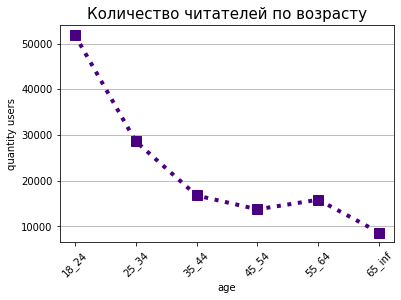

In [ ]:
# построим график распределения пользователей по возрасту

quantity_users_age.plot(linestyle=':',
                        linewidth=4,
                        marker='s',
                        markersize=10,
                        color='indigo',
                        legend=None,
                        rot=45)

plt.title('Количество читателей по возрасту', fontsize=15)
plt.ylabel('quantity users')
plt.grid(axis='y')

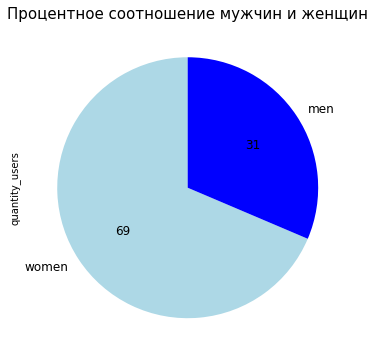

In [ ]:
# построим график процентного соотношения мужчин и женщин среди читателей

quantity_users_sex.plot.pie(y='quantity_users',
                            autopct='%.0f',
                            labels=['women','men'],
                            colors=['lightblue','blue'],
                            fontsize=12,
                            figsize=(6,6),
                            legend=None,
                            startangle=90)
plt.title('Процентное соотношение мужчин и женщин', fontsize=15)
plt.grid()

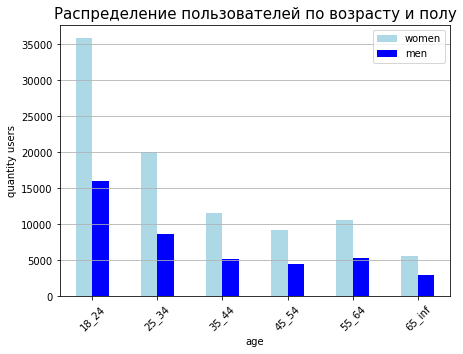

In [ ]:
# построим совместный график распределения пользователей по возрасту и полу

quantity_users_age_sex.plot.bar(label=['women','men'],
                                color=['lightblue','blue'],
                                figsize=(7,5),
                                rot=45)
plt.legend(loc='upper right')
plt.title('Распределение пользователей по возрасту и полу', fontsize=15)
plt.ylabel('quantity users')
plt.grid(axis='y')

In [ ]:
# для следующего графика переиндексируем строки в датафрейме

unique_users_year = unique_users_year.reset_index()
unique_users_year

,start_year,user_id
0,2018,131320
1,2019,129745


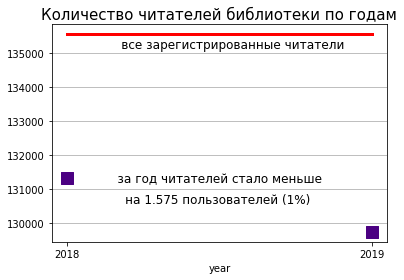

In [ ]:
# построим график количества читателей библиотеки по годам

plt.scatter(['2018', '2019'], unique_users_year['user_id'],
            s=150,
            marker='s',
            color='indigo')

# добавим линию с общим количеством зарегистрированных читателей (их 135.553)
u_u = df_data_all['user_id'].nunique()

plt.plot(['2018', '2019'], [u_u, u_u],
        color='red',
        linewidth=3)

# добавим комментарии к графику
plt.text('2018', 135150, '              все зарегистрированные читатели', fontsize=12)
plt.text('2018', 131200, '             за год читателей стало меньше', fontsize=12)
plt.text('2018', 130600, '               на 1.575 пользователей (1%)', fontsize=12)

plt.title('Количество читателей библиотеки по годам', fontsize=15)
plt.xlabel('year')
plt.grid(axis='y')

Обратимся к книгам: выявим самые читаемые жанры; определим книги и авторов, которые пишут в этих жанрах; посмотрим, каким группам читателей они наиболее интересны.

In [ ]:
# создадим датафрейм жанров

df_data_genres = df_data_all.drop(['user_id','item_id','progress','rating','start_date','title','authors_all','year','age','age_group','sex_all','start_year','start_month'], axis=1)
df_data_genres.head(2)

,Семья / дети / воспитание,Forex,IT-менеджмент,MBA,PR,Project-менеджмент,Автомобили и ПДД,Автотранспорт,Агрохимия,Адвокатура,...,Юмор и сатира,Юмористическая проза,Юмористическая фантастика,Юмористические стихи,Юмористическое фэнтези,Юридические журналы,Юриспруденция,Языковые словари,Языкознание,Японский менеджмент
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# сохраним данные в csv-файл

df_data_genres.to_csv('data_genres.csv', index=False)

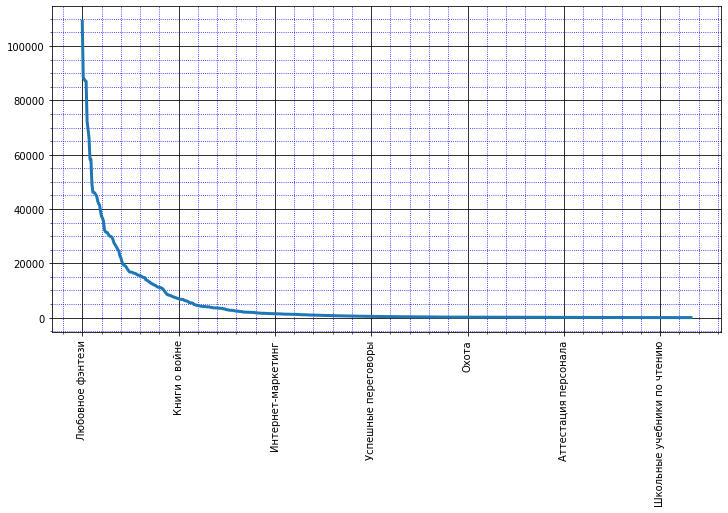

In [ ]:
# посмотрим на общую читаемость жанров

df_data_genres.sum()\
    .sort_values(ascending=False)\
    .plot(linewidth=3, figsize=(12,6), x_compat=True, rot=90)

plt.grid(which='major', color='k')

# добавим вспомогательную сетку, предварительно включив второстепенные деления
plt.minorticks_on()
plt.grid(which='minor', color='b', linestyle=':')

Согласно графику, значимый рост числа прочтений начинается с отметки 20.000.

In [ ]:
# выделим в отдельный датафрейм жанры, прочитанные более 20.000 раз
# (воспользуемся ранее написанной функцией)

df_data_genres_20000 = model_dataframe(df_data_genres, 20000)
df_data_genres_20000

,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,Зарубежная фантастика,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398876,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1398877,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1398878,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1398879,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# посмотрим на названия этих жанров

df_data_genres_20000.columns

Index(['Биографии и мемуары', 'Боевая фантастика', 'Боевое фэнтези', 'Газеты',
       'Героическое фэнтези', 'Городское фэнтези', 'Журнальные издания',
       'Зарубежная классика', 'Зарубежная психология', 'Зарубежная фантастика',
       'Зарубежное фэнтези', 'Зарубежные детективы',
       'Зарубежные любовные романы', 'Здоровье', 'Иронические детективы',
       'Историческая фантастика', 'Книги о приключениях',
       'Книги про волшебников', 'Короткие любовные романы',
       'Космическая фантастика', 'Литература 19 века', 'Литература 20 века',
       'Любовное фэнтези', 'Магические академии', 'Мистика',
       'Научная фантастика', 'Общая история', 'Остросюжетные любовные романы',
       'Полицейские детективы', 'Попаданцы', 'Публицистика',
       'Русская классика', 'Саморазвитие / личностный рост',
       'Современная зарубежная литература', 'Современная русская литература',
       'Современные детективы', 'Современные любовные романы',
       'Социальная фантастика', 'Триллеры',

In [ ]:
# из итогового сводного файла создадим новый датафрейм с 42-мя самыми читаемыми жанрами

columns = ['user_id','item_id','progress','rating','title','authors_all','year','age','age_group','sex_all','start_year','start_month']

df_data_all_42best_genres = df_data_all[[x for x in columns] + [y for y in df_data_genres_20000.columns]]

df_data_all_42best_genres

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,126706,14433,80,NaN,Девятный Спас,Анатолий Брусникин,2007,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,Алмаз в воровскую корону,Евгений Сухов,2006,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,46791,83486,23,5.0,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,18_24,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,79313,188770,88,5.0,Стихотворения,Игорь Северянин,не указан,55_64,5.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,63454,78434,87,NaN,Рай со свистом пуль,Сергей Зверев,2012,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398876,76968,285394,95,NaN,Хитрость,Ги де Мопассан,не указан,55_64,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1398877,153877,285394,76,5.0,Хитрость,Ги де Мопассан,не указан,65_inf,6.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1398878,90021,73789,97,NaN,Дикая охота,Роман Афанасьев,2014,45_54,4.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1398879,6452,77993,39,NaN,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,55_64,5.0,1.0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
# сохраним данные в csv-файл

df_data_all_42best_genres.to_csv('data_all_42best_genres.csv', index=False)

In [5]:
# прочитаем последний сохраненный csv-файл

df_data_all_42best_genres = pd.read_csv('data_all_42best_genres.csv')
df_data_all_42best_genres.head(3)

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,126706,14433,80,NaN,Девятный Спас,Анатолий Брусникин,2007,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,Алмаз в воровскую корону,Евгений Сухов,2006,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,46791,83486,23,5.0,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,18_24,1.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# выделим в отдельный датафрейм возраст пользователей и жанры

df_data_all_42best_genres_age = df_data_all_42best_genres.drop(['user_id','item_id','progress','rating','title','authors_all','year','age_group','sex_all','start_year','start_month'], axis=1)

df_data_all_42best_genres_age.head(3)

,age,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,25_34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,25_34,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18_24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# сгруппируем данные по возрасту

df_data_all_42_age = df_data_all_42best_genres_age\
                    .groupby('age')\
                    .sum()
df_data_all_42_age

,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,Зарубежная фантастика,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
age,,,,,,,,,,,,,,,,,,,,,
18_24,13395,17905,16070,10949,19333,8218,10581,11520,17564,8237,...,25426,11218,26377,22489,30597,8588,13492,10739,16155,8090
25_34,7645,13369,11669,6393,14215,5855,6049,6555,8377,4974,...,12699,6704,17059,16487,18197,5334,9026,5686,10012,5855
35_44,4558,9837,8012,3786,10247,4087,3530,4039,4594,3219,...,6941,4268,11554,11633,11589,3332,6472,3365,6614,4279
45_54,3851,10017,7385,3229,9373,3609,3449,3340,3394,2746,...,5263,3327,10573,10583,8359,2927,5304,2461,4147,3848
55_64,4623,12391,9934,3631,12715,4950,3541,3784,3411,3456,...,5398,4382,14065,15412,12247,3566,7239,2722,6172,5336
65_inf,2625,5974,5244,3412,6558,2783,2709,2095,1680,1897,...,2644,2511,8943,10615,6812,1990,3718,1314,3100,2803


In [ ]:
# сохраним данные в csv-файл

df_data_all_42_age.to_csv('df_data_all_42_age.csv', index=False)

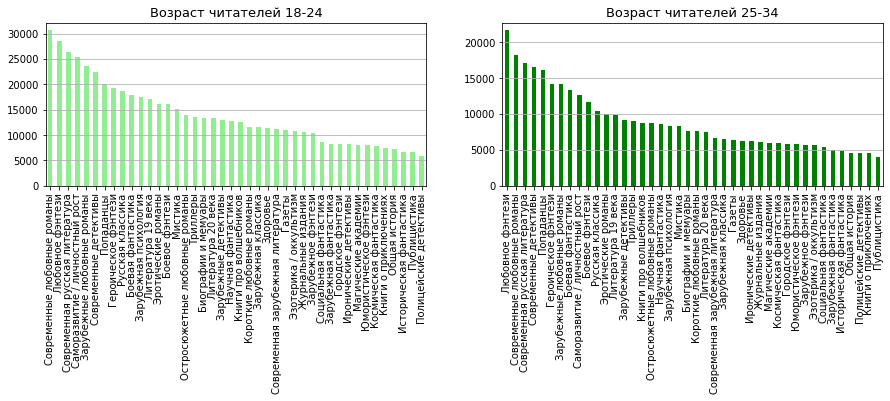

In [ ]:
# построим графики со "смежными" возрастными категориями
# (посмотрим, совпадут ли предпочтения)

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_age.iloc[0,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='lightgreen')
plt.title('Возраст читателей 18-24', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_age.iloc[1,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='green')
plt.title('Возраст читателей 25-34', fontsize=13)
plt.grid(axis='y')

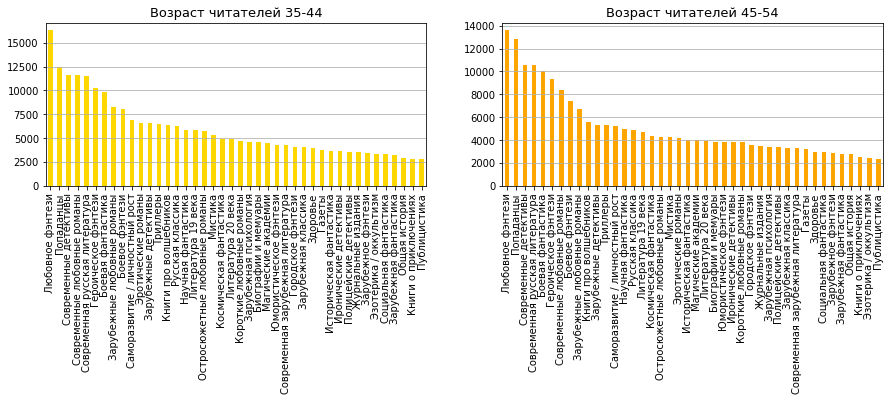

In [ ]:
# графики двух следующих возрастных групп

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_age.iloc[2,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='gold')
plt.title('Возраст читателей 35-44', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_age.iloc[3,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='orange')
plt.title('Возраст читателей 45-54', fontsize=13)
plt.grid(axis='y')

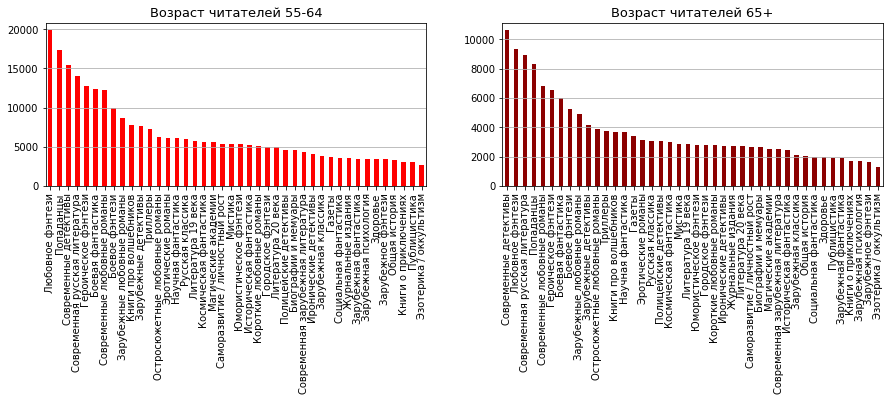

In [ ]:
# графики старшей возрастной группы

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_age.iloc[4,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='red')
plt.title('Возраст читателей 55-64', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_age.iloc[5,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='darkred')
plt.title('Возраст читателей 65+', fontsize=13)
plt.grid(axis='y')

In [ ]:
# сведем в одну таблицу топ-10 жанров суммарно по всем возрастам

top_10_genres_age = pd.DataFrame([
    ['современные любовные романы','V','V','V','V','V','V'],
    ['любовное фэнтези','V','V','V','V','V','V'],
    ['современная русская литература','V','V','V','V','V','V'],
    ['саморазвитие/личностный рост','V','V','V','-','-','-'],
    ['зарубежные любовные романы','V','V','V','V','V','V'],
    ['современные детективы','V','V','V','V','V','V'],
    ['попаданцы','V','V','V','V','V','V'],
    ['боевая фантастика','V','V','V','V','V','V'],
    ['героическое фэнтези','V','V','V','V','V','V'],
    ['русская классика','V','-','-','-','-','-'],
    ['боевое фэнтези','-','V','V','V','V','V'],
    ['книги про волшебников','-','-','-','V','V','-'],
    ['зарубежные детективы','-','-','-','-','-','V']
    ],
    columns=['genres','18-24','25-34','35-44','45-54','55-64','65+']
)
# top_10_genres_age = top_10_genres_age.set_index('genres')
top_10_genres_age

,genres,18-24,25-34,35-44,45-54,55-64,65+
0,современные любовные романы,V,V,V,V,V,V
1,любовное фэнтези,V,V,V,V,V,V
2,современная русская литература,V,V,V,V,V,V
3,саморазвитие/личностный рост,V,V,V,-,-,-
4,зарубежные любовные романы,V,V,V,V,V,V
5,современные детективы,V,V,V,V,V,V
6,попаданцы,V,V,V,V,V,V
7,боевая фантастика,V,V,V,V,V,V
8,героическое фэнтези,V,V,V,V,V,V
9,русская классика,V,-,-,-,-,-


8 из 10 самых читаемых жанров в каждой группе - 

'Современные любовные романы', 'Любовное фэнтези', 'Зарубежные любовные романы',

'Современная русская литература', 'Современные детективы',

'Попаданцы', 'Боевая фантастика', 'Героическое фэнтези' -

не зависят от возраста (это читают все).

Жанр 'Боевое фэнтези' не попал в первую десятку только у самой молодой группы.

In [ ]:
# выделим в отдельный датафрейм жанры и пол пользователей

df_data_all_42best_genres_sex = df_data_all_42best_genres.drop(['user_id','item_id','progress','rating','title','authors_all','year','age','age_group','start_year','start_month'], axis=1)

df_data_all_42best_genres_sex.head(3)

,sex_all,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
0,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# сгруппируем данные по полу

df_data_all_42_sex = df_data_all_42best_genres_sex\
                    .groupby('sex_all')\
                    .sum()
df_data_all_42_sex

,Биографии и мемуары,Боевая фантастика,Боевое фэнтези,Газеты,Героическое фэнтези,Городское фэнтези,Журнальные издания,Зарубежная классика,Зарубежная психология,Зарубежная фантастика,...,Саморазвитие / личностный рост,Современная зарубежная литература,Современная русская литература,Современные детективы,Современные любовные романы,Социальная фантастика,Триллеры,Эзотерика / оккультизм,Эротические романы,Юмористическое фэнтези
sex_all,,,,,,,,,,,,,,,,,,,,,
0.0,25408,35080,32969,20556,46530,20915,19595,22518,28714,16043,...,42429,25264,64823,67580,71172,16069,33309,18641,37027,23341
1.0,11289,34413,25345,10844,25911,8587,10264,8815,10306,8486,...,15942,7146,23748,19639,16629,9668,11942,7646,9173,6870


In [ ]:
# сохраним данные

df_data_all_42_sex.to_csv('df_data_all_42_sex.csv', index=False)

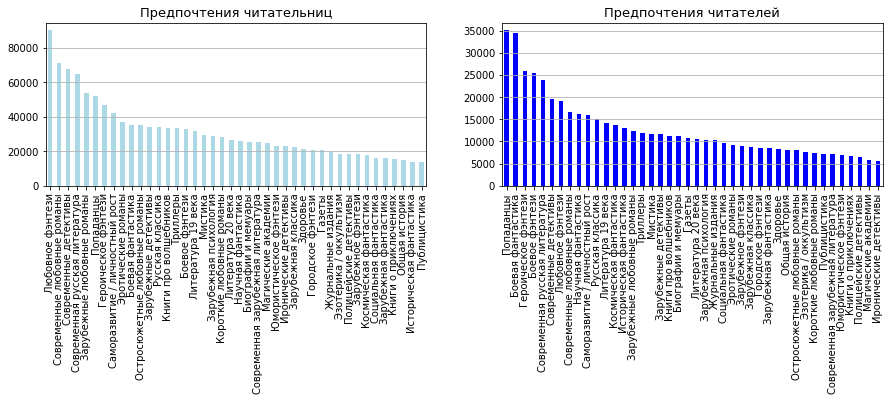

In [ ]:
# построим графики по читателям и читательницам
# (посмотрим, насколько здесь совпадут жанровые предпочтения)

plt.figure(figsize=(15,3))

plt.subplot(1, 2, 1)
df_data_all_42_sex.iloc[0,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='lightblue')
plt.title('Предпочтения читательниц', fontsize=13)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
df_data_all_42_sex.iloc[1,0:]\
        .sort_values(ascending=False)\
        .plot.bar(legend=None, rot=90, color='blue')
plt.title('Предпочтения читателей', fontsize=13)
plt.grid(axis='y')

In [ ]:
# сведем суммарно в одну таблицу топ-10 жанров

top_10_genres_sex = pd.DataFrame([
    ['любовное фэнтези','V','V'],
    ['современные любовные романы','V','V'],
    ['современные детективы','V','V'],
    ['современная русская литература','V','V'],
    ['зарубежные любовные романы','V','-'],
    ['попаданцы','V','V'],
    ['героическое фэнтези','V','V'],
    ['саморазвитие/личностный рост','V','V'],
    ['эротические романы', 'V', '-'],
    ['боевая фантастика','V','V'],
    ['боевое фэнтези','-','V'],
    ['научная фантастика','-','V'],
    ],
    columns=['genres','women','men']
)
# top_10_genres_sex = top_10_genres_sex.set_index('genres')
top_10_genres_sex

,genres,women,men
0,любовное фэнтези,V,V
1,современные любовные романы,V,V
2,современные детективы,V,V
3,современная русская литература,V,V
4,зарубежные любовные романы,V,-
5,попаданцы,V,V
6,героическое фэнтези,V,V
7,саморазвитие/личностный рост,V,V
8,эротические романы,V,-
9,боевая фантастика,V,V


In [ ]:
# объединим два датафрейма для получения общего списка популярных жанров

genres_age_sex = top_10_genres_age.merge(top_10_genres_sex, left_on='genres', right_on='genres', how='outer')
genres_age_sex = genres_age_sex.fillna('-')
genres_age_sex

,genres,18-24,25-34,35-44,45-54,55-64,65+,women,men
0,современные любовные романы,V,V,V,V,V,V,V,V
1,любовное фэнтези,V,V,V,V,V,V,V,V
2,современная русская литература,V,V,V,V,V,V,V,V
3,саморазвитие/личностный рост,V,V,V,-,-,-,V,V
4,зарубежные любовные романы,V,V,V,V,V,V,V,-
5,современные детективы,V,V,V,V,V,V,V,V
6,попаданцы,V,V,V,V,V,V,V,V
7,боевая фантастика,V,V,V,V,V,V,V,V
8,героическое фэнтези,V,V,V,V,V,V,V,V
9,русская классика,V,-,-,-,-,-,-,-


Из 15-ти жанров, которые суммарно вошли в **топ-10 самых читаемых**, не будем рассматривать следующие:

- "саморазвитие/личностный рост" - данный жанр интересен только первой половине возрастных групп,
- "русская классика" - популярна у читателей до 25 лет,
- "книги про волшебников" - читает 1/5 всей аудитории (по количеству пользователей),
- "зарубежные детективы", "эротические романы" и "научная фантастика" - интересны отдельным категориям читателей.

Прежде чем рассматривать самые читаемые жанры и их авторов, разберемся с абонементом "пресса", куда включены различные газеты и журналы. Примечательно, что эти издания пользуются спросом - они вошли в список 42-х самых популярных жанров.

Посмотрим, какие возрастные группы активно читают периодические издания.

In [ ]:
# для построения графика выделим данные по "прессе" в отдельный датафрейм

df_data_all_age_pressa = df_data_all_42_age[['Газеты', 'Журнальные издания']]
df_data_all_age_pressa

,Газеты,Журнальные издания
age,,
18_24,10949,10581
25_34,6393,6049
35_44,3786,3530
45_54,3229,3449
55_64,3631,3541
65_inf,3412,2709


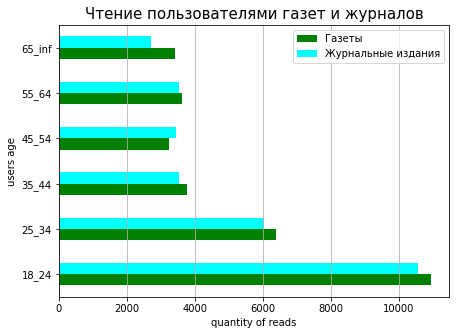

In [ ]:
# построим по "прессе" график

df_data_all_age_pressa.plot.barh(figsize=(7,5),
                                color=['green','cyan'])
plt.legend()
plt.title('Чтение пользователями газет и журналов', fontsize=15)
plt.xlabel('quantity of reads')
plt.ylabel('users age')
plt.grid(axis='x')

Периодические издания, как оказалось, интересны всем, причем пользовательский спрос пропорционален количеству самих читателей. Посмотрим, какие издания читают чаще других.

In [ ]:
# сформируем общий датафрейм по газетам и журналам

df_data_all_newspaper_journal = df_data_all_42best_genres[['item_id','title','age','sex_all','Газеты', 'Журнальные издания']]

df_data_all_newspaper_journal = df_data_all_newspaper_journal\
    .loc[(df_data_all_newspaper_journal['Газеты']==1) | (df_data_all_newspaper_journal['Журнальные издания']==1)]
df_data_all_newspaper_journal

,item_id,title,age,sex_all,Газеты,Журнальные издания
43,285667,Спорт-экспресс 198-2019,18_24,0.0,1,0
54,269175,Сабрина 12-2019,65_inf,0.0,1,0
64,213283,Профиль 15-2017,25_34,1.0,0,1
66,258019,Комсомольская правда 47т-2012,18_24,0.0,1,0
86,250030,Добрые Советы. Люблю Готовить! 09-2018,18_24,1.0,0,1
...,...,...,...,...,...,...
1398752,261203,Лиза 52-2019,45_54,0.0,0,1
1398776,243588,Караван Историй 01-2013,65_inf,1.0,0,1
1398840,155624,Интерес-кроссворд 38-2017,55_64,1.0,1,0
1398846,92946,Интерес-кроссворд 46-2017,25_34,0.0,1,0


In [ ]:
# очистим названия газет и журналов с помощью регулярных выражений,
# создадим паттерн

import re
pattern = r'[а-яёА-ЯЁa-zA-Z\d\s\§\@\#\№\$\%\&\*\;\=\[\]\{\}\.\,\:\!\?\(\)\'\-\|\/\\\+]+\s'

In [ ]:
# поместим названия в кавычки (для работы модуля re)

df_data_all_newspaper_journal.update('"' + df_data_all_newspaper_journal['title'] + '"')
df_data_all_newspaper_journal.head(3)

,item_id,title,age,sex_all,Газеты,Журнальные издания
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,0
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,0
64,213283,"""Профиль 15-2017""",25_34,1.0,0,1


In [ ]:
# запишем в новый столбец "очищенные" значения

df_data_all_newspaper_journal['издания'] = df_data_all_newspaper_journal['title'].map(lambda x: re.findall(pattern, x))
df_data_all_newspaper_journal.head(3)

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,0,[Спорт-экспресс ]
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,0,[Сабрина ]
64,213283,"""Профиль 15-2017""",25_34,1.0,0,1,[Профиль ]


In [ ]:
# преобразуем строки-списки в обычные строки и запишем названия большими буквами
# (для унификации значений)

df_data_all_newspaper_journal.update(df_data_all_newspaper_journal['издания'].astype(str).str.replace('\[|\]',''))
df_data_all_newspaper_journal['издания'] = df_data_all_newspaper_journal['издания'].str.upper()
df_data_all_newspaper_journal.head(3)

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,0,'СПОРТ-ЭКСПРЕСС '
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,0,'САБРИНА '
64,213283,"""Профиль 15-2017""",25_34,1.0,0,1,'ПРОФИЛЬ '


In [ ]:
# определим количество уникальных названий

df_data_all_newspaper_journal['издания'].nunique()

169

In [ ]:
# посмотрим на их перечень

df_data_all_newspaper_journal['издания'].unique()

array(["'СПОРТ-ЭКСПРЕСС '", "'САБРИНА '", "'ПРОФИЛЬ '",
       "'КОМСОМОЛЬСКАЯ ПРАВДА '", "'ДОБРЫЕ СОВЕТЫ. ЛЮБЛЮ ГОТОВИТЬ! '",
       "'ТВОЙ ДЕНЬ '", "'INTEREST-CROSSWORD '",
       "'АРГУМЕНТЫ И ФАКТЫ МОСКВА '", '"MEN\'S HEALTH "', "'ПРАВДА '",
       "'СЕМЬ ДНЕЙ ТВ-ПРОГРАММА '", "'ЗВЕЗДЫ И СОВЕТЫ '",
       "'ЗНАНИЕ-СИЛА '", "'ТАЙНЫ ЗВЕЗД '", "'ВСЕ ДЛЯ ЖЕНЩИНЫ '",
       "'МК МОСКОВСКИЙ КОМСОМОЛЕЦ '", "'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '",
       "'КЛАССНЫЙ ЖУРНАЛ '",
       "'КОМСОМОЛЬСКАЯ ПРАВДА (ТОЛСТУШКА ', ' РОССИЯ) '", "'СМЕНА '",
       "'КУЛЬТУРА '", "'КАРАВАН ИСТОРИЙ. КОЛЛЕКЦИЯ '", "'АВТОМИР '",
       "'НАША ВЕРСИЯ '", "'ЖЕЛТАЯ ГАЗЕТА. ЗАЖИГАЙ! '", "'ЗА РУЛЕМ '",
       "'MAXIM '", "'ОГОНЁК '", "'ЖЕЛТАЯ ГАЗЕТА. ТОЛЬКО ЗВЕЗДЫ '",
       "'ДАЧА PRESSA.RU '", "'ВЯЗАНИЕ\\XA0', ' ВАШЕ ХОББИ '",
       "'ОРАКУЛ. ГАЗЕТА ПРЕДСКАЗАНИЙ '",
       "'КОМСОМОЛЬСКАЯ ПРАВДА. САНКТ-ПЕТЕРБУРГ '", "'ИЗВЕСТИЯ '",
       "'ДОБРЫЕ СОВЕТЫ '", "'КАРАВАН ИСТОРИЙ '", "'ELLE '",
       "'ЖДУ МАЛЫША '", "'MAR

Среди изданий есть "непонятные" названия, посмотрим, какими они должны быть.

In [ ]:
# журнал по вязанию

df_data_all_newspaper_journal[df_data_all_newspaper_journal['издания'].str.contains("' ВАШЕ ХОББИ '")]

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания
922,256645,"""Вязание – Ваше Хобби 03-2015""",55_64,1.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
1011,223931,"""Вязание – Ваше Хобби 09""",35_44,0.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
3119,185027,"""Вязание – Ваше Хобби 05-2019""",35_44,1.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
3403,201578,"""Вязание – Ваше Хобби 03-2019""",45_54,0.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
5481,6645,"""Вязание – Ваше Хобби 06-2015""",35_44,0.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
...,...,...,...,...,...,...,...
1396628,300914,"""Вязание – Ваше Хобби 03-2016""",18_24,0.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
1397152,161284,"""Вязание – Ваше Хобби 05-2018""",55_64,0.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
1397717,127774,"""Вязание – Ваше Хобби 12-2012""",25_34,0.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"
1397855,141773,"""Вязание – Ваше Хобби 10-2019""",18_24,1.0,0,1,"'ВЯЗАНИЕ\XA0', ' ВАШЕ ХОББИ '"


In [ ]:
# журнал по истории

df_data_all_newspaper_journal[df_data_all_newspaper_journal['издания'].str.contains("'РУССКОЙ '")]

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания
1274,49181,"""История от «Русской Семерки» 01-2018""",35_44,1.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
1914,269352,"""История от «Русской Семерки» 02-2016""",18_24,0.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
4331,174469,"""История от «Русской Семерки» 02-2018""",25_34,1.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
5003,85320,"""История от «Русской Семерки» 10-2017""",55_64,0.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
5688,257365,"""История от «Русской Семерки» 11-2017""",25_34,0.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
...,...,...,...,...,...,...,...
1390107,225339,"""История от «Русской Семерки» 10-2019""",25_34,0.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
1393353,308636,"""История от «Русской Семерки» 03-2018""",65_inf,0.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
1394104,225339,"""История от «Русской Семерки» 10-2019""",18_24,0.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"
1397674,302254,"""История от «Русской Семерки» 08-2017""",25_34,1.0,0,1,"'ИСТОРИЯ ОТ ', 'РУССКОЙ '"


In [ ]:
# журнал про фантастику

df_data_all_newspaper_journal[df_data_all_newspaper_journal['издания'].str.contains("'ФАНТАСТИКА И '")]

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания
7819,266363,"""Журнал «Фантастика и Детективы» №9""",45_54,1.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"
9018,302001,"""Журнал «Фантастика и Детективы» №1""",65_inf,0.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"
9064,128789,"""Журнал «Фантастика и Детективы» №12""",65_inf,0.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"
25525,128147,"""Журнал «Фантастика и Детективы» №8""",45_54,1.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"
25867,41301,"""Журнал «Фантастика и Детективы» №4 (16) 2014""",35_44,1.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №4 (16) '"
...,...,...,...,...,...,...,...
1355459,128789,"""Журнал «Фантастика и Детективы» №12""",18_24,0.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"
1379641,302001,"""Журнал «Фантастика и Детективы» №1""",35_44,1.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"
1384194,72357,"""Журнал «Фантастика и Детективы» №7""",65_inf,0.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"
1392468,317111,"""Журнал «Фантастика и Детективы» №4""",18_24,0.0,0,1,"'ЖУРНАЛ ', 'ФАНТАСТИКА И '"


In [ ]:
# журнал, выпускаемый издательством Оксфордского университета

df_data_all_newspaper_journal[df_data_all_newspaper_journal['издания'].str.contains("'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '")]

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания
88615,155520,"""Notes and Queries, Number 56, November 23, 1850""",25_34,0.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
98647,155520,"""Notes and Queries, Number 56, November 23, 1850""",18_24,0.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
161965,155520,"""Notes and Queries, Number 56, November 23, 1850""",35_44,1.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
269506,155520,"""Notes and Queries, Number 56, November 23, 1850""",55_64,1.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
294421,155520,"""Notes and Queries, Number 56, November 23, 1850""",18_24,1.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
345662,155520,"""Notes and Queries, Number 56, November 23, 1850""",18_24,0.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
422772,155520,"""Notes and Queries, Number 56, November 23, 1850""",25_34,0.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
512764,155520,"""Notes and Queries, Number 56, November 23, 1850""",45_54,0.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
513478,155520,"""Notes and Queries, Number 56, November 23, 1850""",25_34,0.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"
842881,155520,"""Notes and Queries, Number 56, November 23, 1850""",35_44,1.0,0,1,"'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '"


In [ ]:
# скорректируем названия (часть 1)

df_data_all_newspaper_journal\
    .loc[df_data_all_newspaper_journal['издания'] == "'ВЯЗАНИЕ\\XA0', ' ВАШЕ ХОББИ '", 'title_new'] = "'ВЯЗАНИЕ - ВАШЕ ХОББИ '"

df_data_all_newspaper_journal\
    .loc[df_data_all_newspaper_journal['издания'] == "'ИСТОРИЯ ОТ ', 'РУССКОЙ '", 'title_new'] = "'ИСТОРИЯ ОТ РУССКОЙ СЕМЕРКИ '"

df_data_all_newspaper_journal\
    .loc[df_data_all_newspaper_journal['издания'] == "'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '", 'title_new'] = "'NOTES AND QUERIES '"

In [ ]:
# скорректируем названия (часть 2)

journal_fantasy = ["'ЖУРНАЛ ', 'ФАНТАСТИКА И '", "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №4 (16) '", "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №6 (18) '", "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №11 (23) '", "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №1 (13) '", 
"'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №7 (19) '"]

df_data_all_newspaper_journal\
    .loc[df_data_all_newspaper_journal['издания'].isin(journal_fantasy), 'title_new'] = "'ЖУРНАЛ ФАНТАСТИКА И ДЕТЕКТИВЫ '"

df_data_all_newspaper_journal

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания,title_new
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,0,'СПОРТ-ЭКСПРЕСС ',NaN
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,0,'САБРИНА ',NaN
64,213283,"""Профиль 15-2017""",25_34,1.0,0,1,'ПРОФИЛЬ ',NaN
66,258019,"""Комсомольская правда 47т-2012""",18_24,0.0,1,0,'КОМСОМОЛЬСКАЯ ПРАВДА ',NaN
86,250030,"""Добрые Советы. Люблю Готовить! 09-2018""",18_24,1.0,0,1,'ДОБРЫЕ СОВЕТЫ. ЛЮБЛЮ ГОТОВИТЬ! ',NaN
...,...,...,...,...,...,...,...,...
1398752,261203,"""Лиза 52-2019""",45_54,0.0,0,1,'ЛИЗА ',NaN
1398776,243588,"""Караван Историй 01-2013""",65_inf,1.0,0,1,'КАРАВАН ИСТОРИЙ ',NaN
1398840,155624,"""Интерес-кроссворд 38-2017""",55_64,1.0,1,0,'ИНТЕРЕС-КРОССВОРД ',NaN
1398846,92946,"""Интерес-кроссворд 46-2017""",25_34,0.0,1,0,'ИНТЕРЕС-КРОССВОРД ',NaN


In [ ]:
# заполним пустые значения

df_data_all_newspaper_journal\
    .loc[df_data_all_newspaper_journal['title_new'].isna(), 'title_new'] = df_data_all_newspaper_journal['издания']

df_data_all_newspaper_journal.head()

,item_id,title,age,sex_all,Газеты,Журнальные издания,издания,title_new
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,0,'СПОРТ-ЭКСПРЕСС ','СПОРТ-ЭКСПРЕСС '
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,0,'САБРИНА ','САБРИНА '
64,213283,"""Профиль 15-2017""",25_34,1.0,0,1,'ПРОФИЛЬ ','ПРОФИЛЬ '
66,258019,"""Комсомольская правда 47т-2012""",18_24,0.0,1,0,'КОМСОМОЛЬСКАЯ ПРАВДА ','КОМСОМОЛЬСКАЯ ПРАВДА '
86,250030,"""Добрые Советы. Люблю Готовить! 09-2018""",18_24,1.0,0,1,'ДОБРЫЕ СОВЕТЫ. ЛЮБЛЮ ГОТОВИТЬ! ','ДОБРЫЕ СОВЕТЫ. ЛЮБЛЮ ГОТОВИТЬ! '


In [ ]:
# проверим на какие издания отличаются столбцы

list(set(df_data_all_newspaper_journal['издания'].unique()) - set(df_data_all_newspaper_journal['title_new'].unique()))

["'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №6 (18) '",
 "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №4 (16) '",
 "'ЖУРНАЛ ', 'ФАНТАСТИКА И '",
 "'ИСТОРИЯ ОТ ', 'РУССКОЙ '",
 "'NOTES AND QUERIES, NUMBER 56, NOVEMBER 23, '",
 "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №7 (19) '",
 "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №1 (13) '",
 "'ЖУРНАЛ ', 'ФАНТАСТИКА И ', ' №11 (23) '",
 "'ВЯЗАНИЕ\\XA0', ' ВАШЕ ХОББИ '"]

In [ ]:
# удалим лишний столбец

df_data_all_newspaper_journal = df_data_all_newspaper_journal.drop(['издания'], axis=1)
df_data_all_newspaper_journal.head(3)

,item_id,title,age,sex_all,Газеты,Журнальные издания,title_new
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,0,'СПОРТ-ЭКСПРЕСС '
54,269175,"""Сабрина 12-2019""",65_inf,0.0,1,0,'САБРИНА '
64,213283,"""Профиль 15-2017""",25_34,1.0,0,1,'ПРОФИЛЬ '


Не у всех изданий корректно указана категория (в частности, "Сабрина" - журнал, а не газета).

Подтвердим это на примере журнала "Советский спорт. Футбол".

In [ ]:
# посмотрим к каким категориям отнесен этот журнал

df_data_all_newspaper_journal\
    .loc[df_data_all_newspaper_journal['title_new'] == "'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '"]

,item_id,title,age,sex_all,Газеты,Журнальные издания,title_new
426,114938,"""Советский Спорт. Футбол 40""",55_64,0.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1058,6037,"""Советский Спорт. Футбол 43""",18_24,0.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1085,302924,"""Советский Спорт. Футбол 31п""",35_44,1.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1168,131164,"""Советский Спорт. Футбол 52""",25_34,0.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1293,214464,"""Советский Спорт. Футбол 33-2019""",55_64,0.0,1,1,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
...,...,...,...,...,...,...,...
1395858,306783,"""Советский Спорт. Футбол 43-2017""",18_24,0.0,1,1,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1396184,122500,"""Советский Спорт. Футбол 46-2016""",45_54,1.0,1,1,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1397287,148261,"""Советский Спорт. Футбол 32-2016""",18_24,0.0,1,1,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1398166,132984,"""Советский Спорт. Футбол 48""",45_54,0.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '


Текущее деление изданий на газеты и журналы для аналитики не пригодно.

Будем использовать конкретные названия для определения читательских предпочтений.

Здесь отмечу, что в базе данных названия некоторых изданий указаны еще и на английском языке, например: "Интерес-кроссворд" и "INTEREST-CROSSWORD", "Советский спорт" и "SOVIET SPORT", "МК Московский комсомолец" и "MK MOSKOVSKII KOMSOMOLETS" и другие. Т.к. нет информации о том, ошибка это или "специальный перевод" изданий, подобные именно "английские" газеты и журналы в расчет браться не будут.

In [ ]:
# сгруппируем данные по названию

news_group = df_data_all_newspaper_journal\
            .groupby(['title_new'])\
            .count().sort_values(by='Газеты', ascending=False)\
            .rename(columns={'Газеты':'количество'})[['количество']]
news_group

,количество
title_new,
'ТВОЙ ДЕНЬ ',6469
'НАША ВЕРСИЯ ',2543
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ ',2048
'ПРОФИЛЬ ',2000
'ИНТЕРЕС-КРОССВОРД ',1833
...,...
'ЛОШАДКИ ',10
'THE RAKE ',10
'AVTOMIR ',10


Рассмотрим издания, которые прочитали более 900 раз (если разделить 900 на 24 (месяца), получится 37.5, т.е. за месяц газету или журнал прочитали больше 37 раз, иначе - больше 1 раза за день).

In [ ]:
# выделим нужный перечень изданий

news_group[news_group['количество'] > 900]

,количество
title_new,
'ТВОЙ ДЕНЬ ',6469
'НАША ВЕРСИЯ ',2543
'СОВЕТСКИЙ СПОРТ. ФУТБОЛ ',2048
'ПРОФИЛЬ ',2000
'ИНТЕРЕС-КРОССВОРД ',1833
'МК МОСКОВСКИЙ КОМСОМОЛЕЦ ',1827
'ТАЙНЫ ЗВЕЗД ',1755
'ЗВЕЗДЫ И СОВЕТЫ ',1670
'ИЗВЕСТИЯ ',1647


In [ ]:
# составим список популярных газет (не включим "Комсомольскую правду": издание выходит во многих
# городах со своим названием /городом/, его интересно рассматривать в целом по Издательскому дому)

news_top = ["'ТВОЙ ДЕНЬ '",
"'НАША ВЕРСИЯ '",
"'ИНТЕРЕС-КРОССВОРД '",
"'МК МОСКОВСКИЙ КОМСОМОЛЕЦ '",
"'ИЗВЕСТИЯ '",
"'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) '",
"'СПОРТ-ЭКСПРЕСС '",
"'КОММЕРСАНТЪ (ПОНЕДЕЛЬНИК-ПЯТНИЦА) '"]

In [ ]:
# и популярных журналов

jour_top = ["'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '",
"'ПРОФИЛЬ '",
"'ТАЙНЫ ЗВЕЗД '",
"'ЗВЕЗДЫ И СОВЕТЫ '",
"'ВСЕ ДЛЯ ЖЕНЩИНЫ '",
"'КАРАВАН ИСТОРИЙ '",
"'ВЯЗАНИЕ - ВАШЕ ХОББИ '",
"'ЛИЗА '"]

Рассмотрим подробнее популярные издания: сначала газеты, затем журналы.

In [ ]:
# выделим в отдельный датафрейм данные по газетам и читателям-женщинам

paper_group_women = df_data_all_newspaper_journal\
        .loc[(df_data_all_newspaper_journal['title_new'].isin(news_top)) & (df_data_all_newspaper_journal['sex_all']==0)]

paper_group_women

,item_id,title,age,sex_all,Газеты,Журнальные издания,title_new
43,285667,"""Спорт-экспресс 198-2019""",18_24,0.0,1,0,'СПОРТ-ЭКСПРЕСС '
92,216463,"""Твой день 211-2015""",18_24,0.0,1,0,'ТВОЙ ДЕНЬ '
404,315424,"""Твой день 190-2014""",18_24,0.0,1,0,'ТВОЙ ДЕНЬ '
690,142279,"""Наша версия 35-2014""",18_24,0.0,1,0,'НАША ВЕРСИЯ '
694,230557,"""Наша Версия 06-2018""",55_64,0.0,1,0,'НАША ВЕРСИЯ '
...,...,...,...,...,...,...,...
1398402,202239,"""Наша версия 50-2015""",55_64,0.0,1,0,'НАША ВЕРСИЯ '
1398618,209974,"""Советский Спорт (Федеральный выпуск) 193-2019""",55_64,0.0,1,0,'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) '
1398628,164672,"""Известия 54-2017""",18_24,0.0,1,0,'ИЗВЕСТИЯ '
1398741,88254,"""Известия 20-2019""",18_24,0.0,1,0,'ИЗВЕСТИЯ '


In [ ]:
# сгруппируем значения по возрасту

paper_top_women = paper_group_women.groupby(['title_new','age'])\
                .count().rename(columns={'Газеты': 'quantity'})[['quantity']]

paper_top_women.to_csv('paper_top_women.csv', index=False)

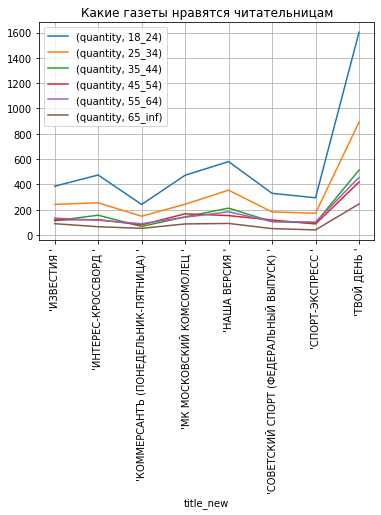

In [ ]:
# и построим график

paper_top_women.unstack('age').plot(rot=90)
plt.title('Какие газеты нравятся читательницам')
plt.legend()
plt.grid()

In [ ]:
# теперь посмотрим на предпочтения читателей: также
# выделим в отдельный датафрейм данные по газетам и читателям-мужчинам

paper_group_men = df_data_all_newspaper_journal\
        .loc[(df_data_all_newspaper_journal['title_new'].isin(news_top)) & (df_data_all_newspaper_journal['sex_all']==1)]

paper_group_men

,item_id,title,age,sex_all,Газеты,Журнальные издания,title_new
334,321216,"""МК Московский Комсомолец 164-2019""",25_34,1.0,1,0,'МК МОСКОВСКИЙ КОМСОМОЛЕЦ '
358,29763,"""Спорт-экспресс 176-2019""",45_54,1.0,1,0,'СПОРТ-ЭКСПРЕСС '
541,46183,"""Твой день 133-2015""",18_24,1.0,1,0,'ТВОЙ ДЕНЬ '
549,259795,"""Спорт-экспресс 260-2019""",45_54,1.0,1,0,'СПОРТ-ЭКСПРЕСС '
920,190735,"""Твой день 134-2014""",65_inf,1.0,1,0,'ТВОЙ ДЕНЬ '
...,...,...,...,...,...,...,...
1398445,121476,"""Твой день 177-2014""",25_34,1.0,1,0,'ТВОЙ ДЕНЬ '
1398504,129911,"""Твой день 100-2014""",35_44,1.0,1,0,'ТВОЙ ДЕНЬ '
1398720,80291,"""Советский Спорт (Федеральный выпуск) 242-2019""",45_54,1.0,1,0,'СОВЕТСКИЙ СПОРТ (ФЕДЕРАЛЬНЫЙ ВЫПУСК) '
1398728,282951,"""Твой день 215-2014""",18_24,1.0,1,0,'ТВОЙ ДЕНЬ '


In [ ]:
# сгруппируем значения по возрасту

paper_top_men = paper_group_men.groupby(['title_new','age'])\
                .count().rename(columns={'Газеты': 'quantity'})[['quantity']]

paper_top_men.to_csv('paper_top_men.csv', index=False)

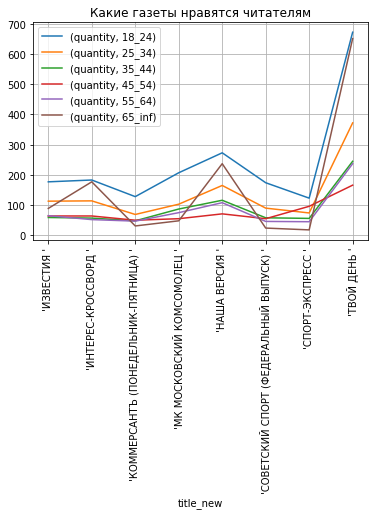

In [ ]:
# и построим график

paper_top_men.unstack('age').plot(rot=90)
plt.title('Какие газеты нравятся читателям')
plt.legend()
plt.grid()

Характер чтения популярных газет у мужчин и женщин немного отличается.

У читательниц интерес к выбранным изданиям практически одинаков.

У читателей-мужчин выделяется самая возрастная группа (от 65 и старше): по количеству прочтений 3-х газет ("Интерес-кроссворд", "Наша версия", "Твой день") она приближается к молодежи, обгоняя остальных.

У всех пользователей самой читаемой оказалась газета "Твой день" - ежедневное издание со светской хроникой, шоу-бизнесом, гороскопом, гаданием и другими подобными рубриками.

In [ ]:
# выделим данные по самым читаемым журналам и читателям-женщинам

jour_group_women = df_data_all_newspaper_journal\
        .loc[(df_data_all_newspaper_journal['title_new'].isin(jour_top)) & (df_data_all_newspaper_journal['sex_all']==0)]

jour_group_women

,item_id,title,age,sex_all,Газеты,Журнальные издания,title_new
300,129084,"""Все Для Женщины 42-2017""",45_54,0.0,0,1,'ВСЕ ДЛЯ ЖЕНЩИНЫ '
325,277434,"""Звезды и Советы 18-2018""",18_24,0.0,0,1,'ЗВЕЗДЫ И СОВЕТЫ '
426,114938,"""Советский Спорт. Футбол 40""",55_64,0.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
449,33868,"""Звезды и Советы 26-2018""",25_34,0.0,0,1,'ЗВЕЗДЫ И СОВЕТЫ '
560,220877,"""Профиль 47-2018""",25_34,0.0,0,1,'ПРОФИЛЬ '
...,...,...,...,...,...,...,...
1398166,132984,"""Советский Спорт. Футбол 48""",45_54,0.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1398203,235622,"""Тайны Звезд 04-2018""",25_34,0.0,1,0,'ТАЙНЫ ЗВЕЗД '
1398556,302369,"""Советский Спорт. Футбол 49""",18_24,0.0,1,0,'СОВЕТСКИЙ СПОРТ. ФУТБОЛ '
1398568,31262,"""Профиль 01-2015""",35_44,0.0,0,1,'ПРОФИЛЬ '


In [ ]:
# сгруппируем значения по возрасту

jour_top_women = jour_group_women.groupby(['title_new','age'])\
                    .count().rename(columns={'title': 'quantity'})[['quantity']]

jour_top_women.to_csv('jour_top_women.csv', index=False)

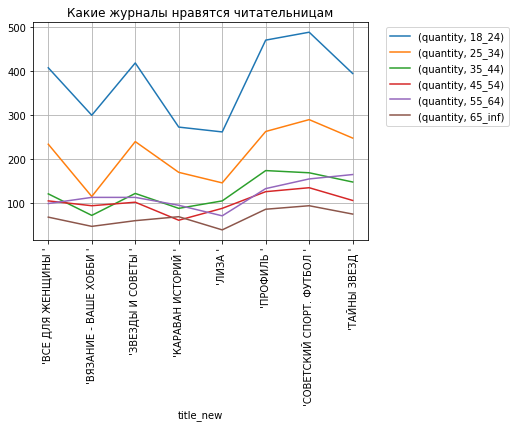

In [ ]:
# построим график

jour_top_women.unstack('age').plot(rot=90)
plt.title('Какие журналы нравятся читательницам')

# вынесем легенду за рамки графика
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()

In [ ]:
# посмотрим на журнальные предпочтения читателей-мужчин (сформируем необходимый датафрейм)

jour_group_men = df_data_all_newspaper_journal\
        .loc[(df_data_all_newspaper_journal['title_new'].isin(jour_top)) & (df_data_all_newspaper_journal['sex_all']==1)]
jour_group_men

,item_id,title,age,sex_all,Газеты,Журнальные издания,title_new
64,213283,"""Профиль 15-2017""",25_34,1.0,0,1,'ПРОФИЛЬ '
211,294406,"""Звезды и Советы 30-2019""",18_24,1.0,0,1,'ЗВЕЗДЫ И СОВЕТЫ '
214,13613,"""Профиль 48-2018""",25_34,1.0,0,1,'ПРОФИЛЬ '
299,212309,"""Тайны Звезд 32-2016""",18_24,1.0,1,0,'ТАЙНЫ ЗВЕЗД '
922,256645,"""Вязание – Ваше Хобби 03-2015""",55_64,1.0,0,1,'ВЯЗАНИЕ - ВАШЕ ХОББИ '
...,...,...,...,...,...,...,...
1397855,141773,"""Вязание – Ваше Хобби 10-2019""",18_24,1.0,0,1,'ВЯЗАНИЕ - ВАШЕ ХОББИ '
1398232,139207,"""Все Для Женщины 45-2017""",45_54,1.0,0,1,'ВСЕ ДЛЯ ЖЕНЩИНЫ '
1398239,244190,"""Лиза 02-2018""",55_64,1.0,0,1,'ЛИЗА '
1398732,120537,"""Все Для Женщины 39-2017""",55_64,1.0,0,1,'ВСЕ ДЛЯ ЖЕНЩИНЫ '


In [ ]:
# сгруппируем значения по возрасту

jour_top_men = jour_group_men.groupby(['title_new','age'])\
                    .count().rename(columns={'title': 'quantity'})[['quantity']]

jour_top_men.to_csv('jour_top_men.csv', index=False)

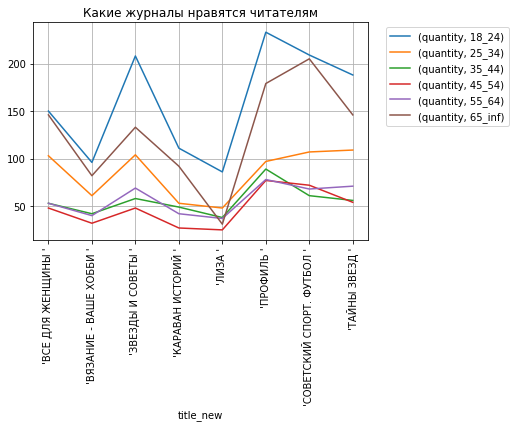

In [ ]:
# построим график

jour_top_men.unstack('age').plot(rot=90)
plt.title('Какие журналы нравятся читателям')

# "вынесем" легенду
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.grid()

Чтение популярных журналов сравнимо с чтением популярных газет:

(1) у читательниц интерес к выбранным изданиям одинаковый и не зависит от возраста. Отмечу журнал "Вязание - ваше хобби": возрастная категория 55-64 читает его наравне с тридцатилетними (если создать отдельный абонемент "Хобби", включив туда издания по вязанию, можно целенаправленно предлагать его этой группе пользователей).

(2) читатели-мужчины старше 65 читают популярные журналы также активно, как и самая молодая группа. Мужчинам одинаково интересны как журнал "Тайны звезд" или "Звезды и советы", так и женский журнал "Все для женщины". Примечательно, что возрастая категория от 35 до 65 лет читает журналы значительно меньше других.

У читательниц самым популярным изданием в анализируемом периоде стал журнал "Советский спорт. Футбол" (вероятно, это связано с проходившим в 2018 году чемпионатом мира по футболу), а у мужчин - журнал "Профиль" (еженедельное деловое издание с аналитическими прогнозами, рейтингами и обзорами в сфере экономики, политики, бизнеса и др.).



Кроме самых читаемых определим и перечень малоинтересных газет и журналов (с точки зрения количества прочтений).
Выявим список изданий, которые за два года прочитали менее 25 раз, т.е. 1 раз за месяц и меньше.

In [ ]:
# определим малочитаемые издания

news_group[news_group['количество'] < 25]

,количество
title_new,
'PROFILE ',24
'ЖДУ МАЛЫША ',24
'ЭКСПЕРТ ЮГ ',23
'БИЗНЕС ЖУРНАЛ ',23
'КОМПАНИЯ ',22
"'МЕЖДУ НАМИ, ЖЕНЩИНАМИ '",19
'КОММЕРСАНТЪ ВЛАСТЬ ',19
'KOMMERSANT ',18
'СВАТЫ. ЗАГОТОВКИ ',17


Среди выбранных изданий есть те, названия которых написаны по-английски, но которые являются российскими газетами и журналами. К таким относятся: Profile, Kommersant, RBK, Our version, Soviet sport, Avtomir, MK Moskovskii komsomolets. Из них три названия - Kommersant, RBK, Avtomir - не содержат информации о каком именно издании идет речь. Все это говорит о неоднородности исходных данных и необходимости их приведения к единому языку и стилю написания.

Перечень малочитаемых изданий не является "окончательным": он зависит от критерия популярности (количества прочтений за период). Тем не менее, данную выборку, с учетом комментариев выше, можно рассматривать для корректировки абонемента "пресса" в МТС library.

**Рассмотрим книги, написанные в 9-ти самых востребованных жанрах** (их перечень определили ранее)

In [6]:
# создадим датафрейм с выбранными 9-ю жанрами

col = ['user_id','item_id','progress','rating','title','authors_all','year','age','age_group','sex_all','start_year','start_month',
       'Боевая фантастика',
       'Боевое фэнтези',
       'Героическое фэнтези',
       'Зарубежные любовные романы',
       'Любовное фэнтези',
       'Попаданцы',
       'Современная русская литература',
       'Современные детективы',
       'Современные любовные романы']

df_data_all_best_9genres = df_data_all_42best_genres[[x for x in col]]

df_data_all_best_9genres

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,start_month,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы
0,126706,14433,80,NaN,Девятный Спас,Анатолий Брусникин,2007,25_34,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
1,127290,140952,58,NaN,Алмаз в воровскую корону,Евгений Сухов,2006,25_34,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
2,46791,83486,23,5.0,Идеальная талия для вашего типа фигуры,Ванесса Томпсон,2003,18_24,1.0,1.0,...,1,0,0,0,0,0,0,0,0,0
3,79313,188770,88,5.0,Стихотворения,Игорь Северянин,не указан,55_64,5.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,63454,78434,87,NaN,Рай со свистом пуль,Сергей Зверев,2012,25_34,2.0,0.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398876,76968,285394,95,NaN,Хитрость,Ги де Мопассан,не указан,55_64,5.0,1.0,...,12,0,0,0,0,0,0,0,0,0
1398877,153877,285394,76,5.0,Хитрость,Ги де Мопассан,не указан,65_inf,6.0,0.0,...,12,0,0,0,0,0,0,0,0,0
1398878,90021,73789,97,NaN,Дикая охота,Роман Афанасьев,2014,45_54,4.0,0.0,...,12,1,0,0,0,0,0,0,0,0
1398879,6452,77993,39,NaN,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,55_64,5.0,1.0,...,12,0,0,0,0,0,0,0,1,0


In [7]:
# оставим те книги-строки, которые непосредственно принадлежат выбранным жанрам

df_data_all_best_9genres = df_data_all_best_9genres.loc[(df_data_all_best_9genres['Боевая фантастика']==1)\
                                                     | (df_data_all_best_9genres['Боевое фэнтези']==1)\
                                                     | (df_data_all_best_9genres['Героическое фэнтези']==1)\
                                                     | (df_data_all_best_9genres['Зарубежные любовные романы']==1)\
                                                     | (df_data_all_best_9genres['Любовное фэнтези']==1)\
                                                     | (df_data_all_best_9genres['Попаданцы']==1)\
                                                     | (df_data_all_best_9genres['Современная русская литература']==1)\
                                                     | (df_data_all_best_9genres['Современные детективы']==1)\
                                                     | (df_data_all_best_9genres['Современные любовные романы']==1)]
df_data_all_best_9genres

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,start_month,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы
6,42797,315927,69,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,1,1,0,0,0,0,0,0,0,0
7,47287,258483,22,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,...,1,1,0,0,0,0,0,0,0,0
8,47551,64060,55,NaN,Быстрая и шустрая,Анна и Сергей Литвиновы,2002,35_44,3.0,0.0,...,1,0,0,0,0,0,0,0,1,0
12,64211,47139,12,NaN,Весенний подарок (сборник),"Елена Нестерина,Татьяна Тронина,Светлана Лубенец",не указан,25_34,2.0,1.0,...,1,0,0,0,0,0,0,0,0,1
13,7074,164341,15,NaN,Парк развлечений,Карла Кэссиди,2015,55_64,5.0,1.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398870,96118,282267,46,NaN,Жизнь взаймы и без гарантий,Наталья Перфилова,2008,18_24,1.0,0.0,...,12,0,0,0,0,0,0,0,1,0
1398875,33221,251316,50,NaN,Дар оружия,Морган Райс,2013,65_inf,6.0,1.0,...,12,0,1,0,0,0,0,0,0,0
1398878,90021,73789,97,NaN,Дикая охота,Роман Афанасьев,2014,45_54,4.0,0.0,...,12,1,0,0,0,0,0,0,0,0
1398879,6452,77993,39,NaN,Новогодние детективные истории (сборник),"Мария Брикер,Наталья Александрова,Анна и Серге...",2018,55_64,5.0,1.0,...,12,0,0,0,0,0,0,0,1,0


In [ ]:
df_data_all_best_9genres.to_csv('data_all_best_9genres.csv', index=False)

In [8]:
# определим (справочно) общее количество авторов

df_data_all_best_9genres['authors_all'].nunique()

5572

In [9]:
# выделим книги жанра "боевая фантастика"

df_battle_fiction = df_data_all_best_9genres.loc[df_data_all_best_9genres['Боевая фантастика']==1]
df_battle_fiction

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,start_month,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы
6,42797,315927,69,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,1,1,0,0,0,0,0,0,0,0
7,47287,258483,22,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,...,1,1,0,0,0,0,0,0,0,0
23,33450,316392,51,NaN,Сталь над волнами,Александр Конторович,2016,65_inf,6.0,1.0,...,1,1,0,0,0,0,1,0,0,0
80,53839,294476,8,NaN,Возрождение,Дмитрий Лазарев,2007,25_34,2.0,0.0,...,1,1,0,0,0,0,0,0,0,0
88,134526,252971,56,5.0,Материализация мысли,Алексей Кутафин,не указан,25_34,2.0,1.0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398814,76999,312316,97,NaN,Воссоединение,Вячеслав Кумин,2008,18_24,1.0,0.0,...,12,1,0,0,0,0,0,0,0,0
1398823,110993,157300,100,NaN,ПереКРЕСТок одиночества,Дем Михайлов,2019,45_54,4.0,0.0,...,12,1,0,0,0,0,1,0,0,0
1398837,52188,127836,52,NaN,Запрещенная фантастика,Андрей Мансуров,2015,25_34,2.0,1.0,...,12,1,0,0,0,0,0,0,0,0
1398848,47785,241249,69,NaN,Спасатель,Александр Калмыков,2018,55_64,5.0,0.0,...,12,1,0,0,0,0,1,0,0,0


In [10]:
# определим количество авторов

df_battle_fiction['authors_all'].nunique()

771

In [11]:
# посмотрим на "варианты" авторства

df_battle_fiction['authors_all'].unique()

array(['Андрей Ворон (Mr. Incognito2)',
       'Дмитрий Володихин,Далия Трускиновская,Александр Тюрин,Олег Дивов,Сергей Чекмаев,Эдуард Геворкян,Вадим Панов,Григорий Елисеев,Александр Белаш,Людмила Белаш,Игорь Прососов,Александр Марков,Сергей Сизарев,Дмитрий Федотов',
       'Александр Конторович', 'Дмитрий Лазарев', 'Алексей Кутафин',
       'Андрей Фролов', 'Сергей Чехин', 'Олег Дивов',
       'Александр Сивинских', 'Сергей Плотников', 'Татьяна Эдельвейс',
       'Александр Шакилов', 'Равиль Таминдаров', 'Хайдарали Усманов',
       'Макс Мах',
       'Андрей Дашков,Дмитрий Володихин,Юлия Зонис,Елена Красносельская,Игорь Вереснев,Николай Немытов,Олег Кожин,Майк Гелприн,Марина Ясинская,Сергей Чебаненко,Алекс Громов,Владимир Венгловский,Василий Головачев,Антон Тудаков,Андрей Звонков,Игорь Авильченко,Арина Свобода,Степан Вартанов,Яков Будницкий,Арти Александер,Дмитрий Лукин,Сергей Васильев,Анна Михалевская,Жаклин де\xa0Гё,Михаил Савеличев,Валентина Орлова,Павел Токаренко,Станислав Шульга,

Среди книг есть сборники (перечислены авторы каждого из произведений), а также те, которые написаны в соавторстве с одним, двумя или тремя писателями. Разделять "коллективное творчество" на отдельных авторов, чтобы в целом оценить их читаемость, не разумно, т.к. это не ответит на вопрос из-за какого именно автора пользователи стали читать тот или иной сборник/книгу.

Поэтому сгруппируем данные по исходным авторам и найдем интересующую нас информацию.

In [12]:
# определим сколько раз читали каждого из авторов жанра "боевая фантастика"

battle_fiction = df_battle_fiction.groupby('authors_all')\
                .count().sort_values(by='title', ascending=False)\
                .rename(columns={'title': 'reading'})[['reading']]
battle_fiction

,reading
authors_all,
Сергей Тармашев,3084
Артем Каменистый,2826
Роман Злотников,2116
Владимир Поселягин,1752
Александр Конторович,1552
...,...
Ольга Комарова,6
"Андрей Дашков,Михаил Кликин,Вадим Вознесенский,Юрий Бурносов,Игорь Вереснев,Дмитрий Висков,Татьяна Бурносова,Олег Кожин,Анна Дербенева,Светлана Тулина,Владислав Женевский,Арина Свобода,Ирина Черкашина,Мила Коротич,Елена Щетинина,Илья Данишевский,Тимур Алиев,Михаил Васильев,Игорь Красноперов,Олег Богомолов,Дарья Леднева,Олег Еж,Евгений Просперов",6
Алекс Уайт,6


In [13]:
# определим по каждому автору сколько его книг загружено в библиотеку

battle_fiction_item = df_battle_fiction.groupby('authors_all')['item_id'].nunique()\
                        .reset_index().sort_values(by='item_id', ascending=False)\
                        .rename(columns={'item_id': 'number_of_books'})

battle_fiction_item

,authors_all,number_of_books
221,Василий Головачев,68
753,Юрий Корчевский,58
17,Александр Афанасьев,53
157,Андрей Ливадный,50
10,Алекс Орлов,49
...,...,...
218,Валерий Михайлов,1
470,Константин Костин,1
469,Константин Колчигин,1
467,Константин Ежов,1


In [14]:
# объединим полученные данные по авторам

battle_fiction_reading_items = battle_fiction.merge(battle_fiction_item, on='authors_all')

battle_fiction_reading_items

,authors_all,reading,number_of_books
0,Сергей Тармашев,3084,33
1,Артем Каменистый,2826,32
2,Роман Злотников,2116,30
3,Владимир Поселягин,1752,46
4,Александр Конторович,1552,34
...,...,...,...
766,Ольга Комарова,6,1
767,"Андрей Дашков,Михаил Кликин,Вадим Вознесенский...",6,1
768,Алекс Уайт,6,1
769,Виталий Денисов,5,1


In [15]:
# выведем список авторов, книги которых прочитали больше 1000 раз

battle_fiction_reading_items[battle_fiction_reading_items['reading'] > 1000]

,authors_all,reading,number_of_books
0,Сергей Тармашев,3084,33
1,Артем Каменистый,2826,32
2,Роман Злотников,2116,30
3,Владимир Поселягин,1752,46
4,Александр Конторович,1552,34
5,Юрий Корчевский,1510,58
6,Макс Глебов,1281,10
7,Александр Мазин,1134,19
8,Василий Головачев,1084,68
9,Константин Муравьёв,1041,21


Как показыват данные, Сергеем Тармашевым пользователи интересовались почти в 3 раза чаще, чем, например, Василием Головачевым, при этом у последнего в библиотеке книг в 2 раза больше.

Информация носит рекомендательный характер: если автора много читают, на его книги следует обратить внимание и, по возможности, включать в библиотеку новые произведения. Аналогично - с малочитаемыми книгами: если в другие периоды, кроме рассмотренных 2018-2019 годов, какие-то произведения почти не читали, целесообразно исключить их из библиотеки.

В дополнение к полученной информации определим по данному жанру самую читаемую книгу у каждого автора.

In [51]:
# определим сколько раз прочитали каждую книгу в разрезе авторов жанра
# (напомню, что у произведений, авторство которых однозначно не определено, в графе автор - "не указан")

bf = df_battle_fiction.groupby(['authors_all', 'item_id'])\
                .count().rename(columns={'age': 'quantity'})[['quantity']]
bf = bf.reset_index()
bf

,authors_all,item_id,quantity
0,Angel Delacruz,35935,5
1,Angel Delacruz,312770,6
2,Henry Oldie,99265,13
3,Алан Фостер,73495,15
4,Алан Фостер,221117,15
...,...,...,...
2620,не указан,86201,12
2621,не указан,96517,18
2622,не указан,204496,16
2623,не указан,317911,11


In [59]:
# оставим у каждого книгу с максимальным количеством прочтений

bf_max = bf.sort_values(['authors_all', 'quantity'], ascending=[True, False])\
        .drop_duplicates(subset='authors_all', keep='first')\
        .reset_index(drop=True)
bf_max

,authors_all,item_id,quantity
0,Angel Delacruz,312770,6
1,Henry Oldie,99265,13
2,Алан Фостер,234765,18
3,Алекс Бессмертный,261265,14
4,Алекс Бор,174555,11
...,...,...,...
766,Юрий Харитонов,112221,33
767,Ян Валетов,218509,16
768,Ярослав Горбачев,91248,12
769,Ярослав Коваль,142004,17


In [67]:
# получим по id книги ее название

bf_max_title = bf_max.merge(df_battle_fiction, how='left', left_on='item_id', right_on='item_id')\
                    .drop_duplicates(subset='item_id', keep='first')\
                    .reset_index(drop=True)[['authors_all_x','item_id','quantity','title']]
bf_max_title

,authors_all_x,item_id,quantity,title
0,Angel Delacruz,312770,6,Молодые Боги
1,Henry Oldie,99265,13,The End Justifies the Means
2,Алан Фостер,234765,18,Чужой: Завет. Начало
3,Алекс Бессмертный,261265,14,Действие SKY. Часть первая
4,Алекс Бор,174555,11,Гнилой
...,...,...,...,...
766,Юрий Харитонов,112221,33,Метро 2035: Приют забытых душ
767,Ян Валетов,218509,16,Ничья земля
768,Ярослав Горбачев,91248,12,Шестеренки апокалипсиса
769,Ярослав Коваль,142004,17,Магия чрезвычайных ситуаций


In [72]:
# создадим итоговый датафрейм по авторам жанра

battle_fiction_reading_books_title = battle_fiction_reading_items\
                    .merge(bf_max_title, how='left', left_on='authors_all', right_on='authors_all_x')[['authors_all','reading','number_of_books','title','quantity']]

battle_fiction_reading_books_title = battle_fiction_reading_books_title\
                    .rename(columns={'authors_all':'автор','reading':'ск-ко раз его читали','number_of_books':'книг в библ-ке','title':'самая популярная книга','quantity':'ск-ко раз прочитана'})
battle_fiction_reading_books_title

,автор,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Сергей Тармашев,3084,33,Катастрофа,269
1,Артем Каменистый,2826,32,Пять жизней читера,217
2,Роман Злотников,2116,30,Шаг к звездам,164
3,Владимир Поселягин,1752,46,Прорыв,77
4,Александр Конторович,1552,34,Черная смерть,133
...,...,...,...,...,...
766,Ольга Комарова,6,1,После конца,6
767,"Андрей Дашков,Михаил Кликин,Вадим Вознесенский...",6,1,Мистериум. Полночь дизельпанка,6
768,Алекс Уайт,6,1,Чужой: Холодная кузница,6
769,Виталий Денисов,5,1,Золото Ригаса,5


In [73]:
# сохраним файл

battle_fiction_reading_books_title.to_csv('battle_fiction_reading_books_title.csv', index=False)

По остальным выбранным жанрам необходимо получить аналогичный результат - таблицу с авторами, их читаемостью, популярными книгами и др.

Напишем функцию для "ускорения процесса", в csv-файлы будем сохранять итоговые данные.

In [96]:
# функция для получения сводной информации по авторам выбранного жанра

def authors_on_genre_books(df, genre):
        df_main = df.loc[df[genre]==1]
        df_1 = df_main.groupby('authors_all').count().sort_values(by='title', ascending=False).rename(columns={'title':'reading'})[['reading']]
        df_2 = df_main.groupby('authors_all')['item_id'].nunique().reset_index().sort_values(by='item_id', ascending=False).rename(columns={'item_id':'books'})
        df_3m = df_1.merge(df_2, on='authors_all')
        df_4 = df_main.groupby(['authors_all', 'item_id']).count().rename(columns={'age': 'quantity'})[['quantity']]
        df_4 = df_4.reset_index()
        df_5 = df_4.sort_values(['authors_all', 'quantity'], ascending=[True, False]).drop_duplicates(subset='authors_all', keep='first').reset_index(drop=True)
        df_6m = df_5.merge(df_main, how='left', left_on='item_id', right_on='item_id').drop_duplicates(subset='item_id', keep='first').reset_index(drop=True)[['authors_all_x','item_id','quantity','title']]
        df_itog = df_3m.merge(df_6m, how='left', left_on='authors_all', right_on='authors_all_x')[['authors_all','reading','books','title','quantity']]
        df_itog = df_itog.rename(columns={'authors_all': genre +': авторы','reading':'ск-ко раз его читали','books':'книг в библ-ке','title':'самая популярная книга','quantity':'ск-ко раз прочитана'})

        return df_itog

In [97]:
# проверим работу функции на уже "обработанном" жанре

battle_fiction_authors = authors_on_genre_books(df_data_all_best_9genres, 'Боевая фантастика')
battle_fiction_authors

,Боевая фантастика: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Сергей Тармашев,3084,33,Катастрофа,269
1,Артем Каменистый,2826,32,Пять жизней читера,217
2,Роман Злотников,2116,30,Шаг к звездам,164
3,Владимир Поселягин,1752,46,Прорыв,77
4,Александр Конторович,1552,34,Черная смерть,133
...,...,...,...,...,...
766,Ольга Комарова,6,1,После конца,6
767,"Андрей Дашков,Михаил Кликин,Вадим Вознесенский...",6,1,Мистериум. Полночь дизельпанка,6
768,Алекс Уайт,6,1,Чужой: Холодная кузница,6
769,Виталий Денисов,5,1,Золото Ригаса,5


Результат получился идентичным, применим данную функцию к остальным 8-ми жанрам.

In [98]:
# жанр "боевое фэнтези"

battle_fantasy_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Боевое фэнтези')
battle_fantasy_reading_books_title

,Боевое фэнтези: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Джордж Мартин,3747,13,Игра престолов. Часть I,1018
1,Анджей Сапковский,2989,21,Ведьмак,1271
2,Гай Орловский,1964,63,Мир Трех Лун,69
3,Вадим Панов,1656,25,Красная угроза,309
4,Алексей Пехов,1476,18,Тень ингениума,146
...,...,...,...,...,...
601,Данил Хлуденко,6,1,Волкодлак на службе у Лешего,6
602,Вольф Белов,6,1,Бельфеддор,6
603,Андрей Кулыбко,6,1,"Пешка решает всё, или Тайны Белого короля. Час...",6
604,Анна Гале,6,1,Двуликий,6


In [99]:
battle_fantasy_reading_books_title.to_csv('battle_fantasy_reading_books_title.csv', index=False)

In [100]:
# жанр "героическое фэнтези"

heroic_fantasy_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Героическое фэнтези')
heroic_fantasy_reading_books_title

,Героическое фэнтези: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Анджей Сапковский,3012,22,Ведьмак,1271
1,Алексей Пехов,1915,24,Страж,212
2,Александра Лисина,1775,32,Беглянка,189
3,Джордж Мартин,1674,8,Игра престолов,861
4,Вадим Панов,1626,26,Красная угроза,309
...,...,...,...,...,...
625,"Виктор Ночкин,Бэлла Крейнина",7,1,Красотки и оборотни,7
626,Илья Зубец,7,1,Стальной Дух,7
627,Михаил Перлин,6,1,Академия II. Путь Белого Странника,6
628,Александра Руда,6,1,Ола и Отто. Столица,6


In [101]:
heroic_fantasy_reading_books_title.to_csv('heroic_fantasy_reading_books_title.csv', index=False)

In [102]:
# жанр "зарубежные любовные романы"

foreign_love_novels_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Зарубежные любовные романы')
foreign_love_novels_reading_books_title

,Зарубежные любовные романы: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Анна Тодд,3393,7,После,1323
1,Сара Джио,3182,9,Фиалки в марте,1300
2,Э. Л. Джеймс,3070,5,Пятьдесят оттенков серого,1341
3,Линн Грэхем,1869,27,Благородный соблазнитель,244
4,Сесилия Ахерн,1303,15,P.S. Я люблю тебя,192
...,...,...,...,...,...
527,Дж. Р. Уорд,7,1,Игрок,7
528,Молли Эванс,7,1,Кардиограмма страсти,7
529,Дебра Коуэн,7,1,Любовник под подозрением,7
530,Хармони Верна,6,1,Леонора. Девушка без прошлого,6


In [103]:
foreign_love_novels_reading_books_title.to_csv('foreign_love_novels_reading_books_title.csv', index=False)

In [104]:
# жанр "любовное фэнтези"

love_fantasy_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Любовное фэнтези')
love_fantasy_reading_books_title

,Любовное фэнтези: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Елена Звёздная,7031,29,Долина драконов. Магическая Практика,463
1,Анна Гаврилова,3114,24,"Каникулы в Раваншире, или Свадьбы не будет!",340
2,Франциска Вудворт,2898,16,Песнь златовласой сирены. Жар огня,273
3,Милена Завойчинская,2623,18,Струны волшебства. Книга вторая. Цветная музык...,342
4,Наталья Жильцова,2459,14,Обрученные кровью. Отбор,415
...,...,...,...,...,...
624,Алексей Калинин,7,1,Святая ведьма,7
625,Максим Кан,7,1,Легенды династий,7
626,Наталья Тихая,7,1,Золотой дракон,7
627,"Наталья Лапина,Светлана Горбань",7,1,Если полюбишь проклятье,7


In [105]:
love_fantasy_reading_books_title.to_csv('love_fantasy_reading_books_title.csv', index=False)

In [106]:
# жанр "попаданцы"

fallout_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Попаданцы')
fallout_reading_books_title

,Попаданцы: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Артем Каменистый,2421,26,Пять жизней читера,217
1,Владимир Поселягин,2326,54,Рунный маг,124
2,Роман Злотников,2197,27,Шаг к звездам,164
3,Константин Калбазов,1742,39,Фаворит. Боярин,77
4,Милена Завойчинская,1730,13,"Приморская академия, или Ты просто пока не привык",259
...,...,...,...,...,...
788,Михей Абевега,7,1,Ярлинги поневоле,7
789,Святослав Логинов,7,1,Россия за облаком,7
790,Angel Delacruz,6,1,Молодые Боги,6
791,Елена Рудакова,5,1,Девятиэтажка,5


In [107]:
fallout_reading_books_title.to_csv('fallout_reading_books_title.csv', index=False)

In [108]:
# жанр "современная русская литература"

modern_russian_literature_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Современная русская литература')
modern_russian_literature_reading_books_title

,Современная русская литература: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Дина Рубина,7648,129,Яблоки из сада Шлицбутера,2164
1,Виктор Пелевин,4697,78,S.N.U.F.F.,1180
2,Борис Акунин,2852,8,Сказки для идиотов (сборник),2157
3,Мария Метлицкая,2295,61,Дневник свекрови,511
4,Гузель Яхина,2278,2,Зулейха открывает глаза,1949
...,...,...,...,...,...
2000,Татьяна Герцик,5,1,Рассказы (сборник),5
2001,Максим Возняк,4,1,101 дзэнская история про Гитлера. Только для и...,4
2002,Вячеслав Въюга,4,1,Записки путешественника. Прага. День 1. Не пре...,4
2003,Сергей Корнев,4,1,Гол последней надежды,4


In [109]:
modern_russian_literature_reading_books_title.to_csv('modern_russian_literature_reading_books_title.csv', index=False)

In [110]:
# жанр "современные детективы"

modern_detectives_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Современные детективы')
modern_detectives_reading_books_title

,Современные детективы: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Татьяна Полякова,11239,94,Знак предсказателя,643
1,Татьяна Устинова,6967,52,Земное притяжение,896
2,Ю Несбё,4368,8,Снеговик,2089
3,Марина Серова,4071,288,Плата за рейтинг,126
4,Анна и Сергей Литвиновы,3902,139,Свадьбы не будет,143
...,...,...,...,...,...
731,Лука Д'Андреа,6,1,Сущность зла,6
732,Артём Удовицкий,6,1,Нейтралия. Знакомство в Сети,6
733,Илья Булгаков,6,1,Дамы. Пьесы для театра в моей голове,6
734,Мария Шкатулова,5,1,Убийство в Озерках,5


In [111]:
modern_detectives_reading_books_title.to_csv('modern_detectives_reading_books_title.csv', index=False)

In [112]:
# жанр "современные любовные романы"

modern_love_novels_reading_books_title = authors_on_genre_books(df_data_all_best_9genres, 'Современные любовные романы')
modern_love_novels_reading_books_title

,Современные любовные романы: авторы,ск-ко раз его читали,книг в библ-ке,самая популярная книга,ск-ко раз прочитана
0,Анна Тодд,3393,7,После,1323
1,Сара Джио,2793,7,Фиалки в марте,1300
2,Екатерина Вильмонт,2729,35,Девочка с перчиками,210
3,Эмилия Грин,1927,11,Леди и Бродяга,278
4,Яна Егорова,1917,24,У тебя будет секс со мной,204
...,...,...,...,...,...
1212,Андрей Данилов,5,1,Безбожник. Исповедь,5
1213,Юлия Меньшикова,5,1,"Лунные истории для тех, кто не спит",5
1214,Дмитрий Барчук,4,1,Майдан для двоих. Семейная сага,4
1215,Доктор Нонна,4,1,Немачеха (сборник),4


In [113]:
modern_love_novels_reading_books_title.to_csv('modern_love_novels_reading_books_title.csv', index=False)

Из рассмотренных 9-ти жанров, самое большое количество авторов - 2005 - пишут в жанре "Современная русская литература", на втором месте - "Современные любовные романы" с 1217-ю авторами, на третьем - "Попаданцы" (793 писателя).

Каждый из авторов по-своему популярен у пользователей, но особенно выделяются Татьяна Полякова (ее произведения в жанре "Современные детективы" прочитали в общей сложности 11.239 раз), Дина Рубина (7648 прочтений в жанре "Современная русская литература") и Елена Звёздная	(жанр "Любовное фэнтези", 7031 раз).

Написанные произведения, зачастую, не относятся строго к одному жанру. Например, один из самых читаемых авторов, Артем Каменистый с романом "Пять жизней читера" присутствует как в "Боевой фантастике", так и в "Попаданцах".

Если автор пишет захватывающие книги и пользователи с интересом их читают, жанр может "уйти" на второй план. Например, Милена Завойчинская также входит в топ-5 самых читаемых авторов: в жанре "Попаданцы" ее популярный роман - "Приморская академия, или ты просто пока не привык", а в жанре "Любовное фэнтези" - роман "Струны волшебства. Книга вторая. Цветная музыка сидхе".

Каждый читает книги по-разному:

- кто-то может прочесть только первые 30-50 страниц, и поняв что роман не захватывает, переключиться на другое произведение или даже автора;
- кто-то будет дочитывать до конца, несмотря на слабый сюжет, в надежде увидеть потрясающий финал.

Здесь важна и скорость чтения. Согласно исследованиям, в среднем обычный взрослый человек читает 17 книг в год, т.е. больше 1 книги в месяц. Это среднее значение: есть те, кто читает намного больше 17-ти книг, и те, кто читает гораздо меньше - ни одной (44% россиян вообще не берут ни одной книги в руки за весь год - данные опроса 2013 года).

Определим, кто из пользователей MTC library уделяет чтению больше времени и произведения какого из 9-ти жанров чаще дочитывают до конца.

С этой целью, чтобы пользователям "дать возможность" дочитать книгу, из рассматриваемого периода (2018 и 2019 гг.) удалим два последних месяца 2019 года - ноябрь и декабрь: в конце года большинство занято завершением рабочих проектов и предновогодней суетой, книги "уходят на второй план".

In [3]:
# посмотрим на исходные данные по 9-ти жанрам

df_data_all_best_9genres = pd.read_csv('data_all_best_9genres.csv')
df_data_all_best_9genres.head(2)

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,start_month,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы
0,42797,315927,69,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,1,1,0,0,0,0,0,0,0,0
1,47287,258483,22,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,...,1,1,0,0,0,0,0,0,0,0


In [5]:
# выведем список названий всех столбцов

list(df_data_all_best_9genres.columns)

['user_id',
 'item_id',
 'progress',
 'rating',
 'title',
 'authors_all',
 'year',
 'age',
 'age_group',
 'sex_all',
 'start_year',
 'start_month',
 'Боевая фантастика',
 'Боевое фэнтези',
 'Героическое фэнтези',
 'Зарубежные любовные романы',
 'Любовное фэнтези',
 'Попаданцы',
 'Современная русская литература',
 'Современные детективы',
 'Современные любовные романы']

In [6]:
# выберем данные нужного периода

month = [11, 12]

period_22month = df_data_all_best_9genres\
    .loc[~((df_data_all_best_9genres['start_year']==2019) & (df_data_all_best_9genres['start_month'].isin(month)))]

period_22month

,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,start_month,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы
0,42797,315927,69,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,1,1,0,0,0,0,0,0,0,0
1,47287,258483,22,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,...,1,1,0,0,0,0,0,0,0,0
2,47551,64060,55,NaN,Быстрая и шустрая,Анна и Сергей Литвиновы,2002,35_44,3.0,0.0,...,1,0,0,0,0,0,0,0,1,0
3,64211,47139,12,NaN,Весенний подарок (сборник),"Елена Нестерина,Татьяна Тронина,Светлана Лубенец",не указан,25_34,2.0,1.0,...,1,0,0,0,0,0,0,0,0,1
4,7074,164341,15,NaN,Парк развлечений,Карла Кэссиди,2015,55_64,5.0,1.0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
520947,44991,317814,90,NaN,"Клуб 27. Как умирали кумиры. Секс, наркотики и...",Джим Джонс,не указан,18_24,1.0,0.0,...,10,0,0,0,0,0,0,1,0,0
520948,43209,260044,18,NaN,Истринский цикл: Лекарь. Маг. Военачальник. Се...,Евгений Щепетнов,"2012, 2013",45_54,4.0,0.0,...,10,0,1,1,0,1,1,0,0,0
520949,141901,39952,33,NaN,Академия магического права. Брюнетка в бою,"Наталья Жильцова,Азалия Еремеева",2016,55_64,5.0,0.0,...,10,0,1,0,0,1,0,0,0,0
520950,6725,67643,99,NaN,Королевство Бездуш. Академия,Марина Суржевская,2018,25_34,2.0,0.0,...,10,0,0,0,0,1,0,0,0,0


In [7]:
# посмотрим на значения в столбце "прогресс"

period_22month.progress.unique()

array([ 69,  22,  55,  12,  15,  42,  28,  78,  51,  99,   0, 100,  17,
        39,  11,  25,  29,  86,  35,  46,   8,  62,  56,  38,  70,  50,
        85,   3,  24,   4,   2,  95,  82,  65,  43,  19,   5,  80,  23,
        49,  68,  53,  60,  57,  93,  36,   7,  72,  30,  87,  37,  97,
        67,  33,  73,  83,  20,   1,  45,  74,  90,   9,  54,  81,  88,
        31,  16,  98,  59,  92,  64,  52,  94,   6,  58,  14,  32,  41,
        44,  10,  40,  76,  47,  26,  18,  79,  13,  75,  96,  48,  89,
        63,  71,  77,  61,  34,  84,  21,  27,  91,  66], dtype=int64)

Присутствуют все значения в интервале от 0 до 100.

Определим следующие группы в прогрессе чтения книг:
* 0 - 15  - "только ознакомились" (если считать, что в книге примерно 350 страниц, то чтение 50-ти страниц - то количество, после которого понятно, стоит ли читать дальше - составляет около 15%),
* 16 - 25  - "подошли к 1/4",
* 26 - 50  - "приблизились к середине",
* 51 - 84  - "прочли больше половины",
* 85 - 99  - "почти закончили",
* 100  - "прочитали полностью".

In [8]:
# создадим нужные интервалы

progress_1 = list(range(0, 16))
progress_2 = list(range(16, 26))
progress_3 = list(range(26, 51))
progress_4 = list(range(51, 85))
progress_5 = list(range(85, 100))

In [9]:
# добавим в новый столбец названия интервалов

period_22month.loc[period_22month['progress'].isin(progress_1), 'volume_of_read'] = 'только ознакомились'
period_22month.loc[period_22month['progress'].isin(progress_2), 'volume_of_read'] = 'подошли к 1/4'
period_22month.loc[period_22month['progress'].isin(progress_3), 'volume_of_read'] = 'приблизились к середине'
period_22month.loc[period_22month['progress'].isin(progress_4), 'volume_of_read'] = 'прочли больше половины'
period_22month.loc[period_22month['progress'].isin(progress_5), 'volume_of_read'] = 'почти закончили'
period_22month.loc[period_22month['progress'] == 100, 'volume_of_read'] = 'прочитали полностью'

period_22month.head()

C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,user_id,item_id,progress,rating,title,authors_all,year,age,age_group,sex_all,...,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы,volume_of_read
0,42797,315927,69,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,1,0,0,0,0,0,0,0,0,прочли больше половины
1,47287,258483,22,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,...,1,0,0,0,0,0,0,0,0,подошли к 1/4
2,47551,64060,55,NaN,Быстрая и шустрая,Анна и Сергей Литвиновы,2002,35_44,3.0,0.0,...,0,0,0,0,0,0,0,1,0,прочли больше половины
3,64211,47139,12,NaN,Весенний подарок (сборник),"Елена Нестерина,Татьяна Тронина,Светлана Лубенец",не указан,25_34,2.0,1.0,...,0,0,0,0,0,0,0,0,1,только ознакомились
4,7074,164341,15,NaN,Парк развлечений,Карла Кэссиди,2015,55_64,5.0,1.0,...,0,0,0,1,0,0,0,0,0,только ознакомились


Код исполнен, но с замечанием. Попробуем это исправить, использовав фильтры значений по установленному индекс-столбцу "progress".

In [10]:
# установим столбец 'progress' в качестве индексов и запишем (в новый столбец) категорию прочтения книги

period_22month = period_22month.set_index(['progress'])

period_22month.loc[period_22month.index.isin(progress_1), 'volume_of_readed'] = 'только ознакомились'
period_22month.loc[period_22month.index.isin(progress_2), 'volume_of_readed'] = 'подошли к 1/4'
period_22month.loc[period_22month.index.isin(progress_3), 'volume_of_readed'] = 'приблизились к середине'
period_22month.loc[period_22month.index.isin(progress_4), 'volume_of_readed'] = 'прочли больше половины'
period_22month.loc[period_22month.index.isin(progress_5), 'volume_of_readed'] = 'почти закончили'
period_22month.loc[period_22month.index == 100, 'volume_of_readed'] = 'прочитали полностью'

period_22month

,user_id,item_id,rating,title,authors_all,year,age,age_group,sex_all,start_year,...,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы,volume_of_read,volume_of_readed
progress,,,,,,,,,,,,,,,,,,,,,
69,42797,315927,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,2018,...,0,0,0,0,0,0,0,0,прочли больше половины,прочли больше половины
22,47287,258483,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,2018,...,0,0,0,0,0,0,0,0,подошли к 1/4,подошли к 1/4
55,47551,64060,NaN,Быстрая и шустрая,Анна и Сергей Литвиновы,2002,35_44,3.0,0.0,2018,...,0,0,0,0,0,0,1,0,прочли больше половины,прочли больше половины
12,64211,47139,NaN,Весенний подарок (сборник),"Елена Нестерина,Татьяна Тронина,Светлана Лубенец",не указан,25_34,2.0,1.0,2018,...,0,0,0,0,0,0,0,1,только ознакомились,только ознакомились
15,7074,164341,NaN,Парк развлечений,Карла Кэссиди,2015,55_64,5.0,1.0,2018,...,0,0,1,0,0,0,0,0,только ознакомились,только ознакомились
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,44991,317814,NaN,"Клуб 27. Как умирали кумиры. Секс, наркотики и...",Джим Джонс,не указан,18_24,1.0,0.0,2019,...,0,0,0,0,0,1,0,0,почти закончили,почти закончили
18,43209,260044,NaN,Истринский цикл: Лекарь. Маг. Военачальник. Се...,Евгений Щепетнов,"2012, 2013",45_54,4.0,0.0,2019,...,1,1,0,1,1,0,0,0,подошли к 1/4,подошли к 1/4
33,141901,39952,NaN,Академия магического права. Брюнетка в бою,"Наталья Жильцова,Азалия Еремеева",2016,55_64,5.0,0.0,2019,...,1,0,0,1,0,0,0,0,приблизились к середине,приблизились к середине


In [11]:
# вернем индексы в первоначальный вид

period_22month = period_22month.reset_index()
period_22month.head(2)

,progress,user_id,item_id,rating,title,authors_all,year,age,age_group,sex_all,...,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы,volume_of_read,volume_of_readed
0,69,42797,315927,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,0,0,0,0,0,0,0,0,прочли больше половины,прочли больше половины
1,22,47287,258483,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,...,0,0,0,0,0,0,0,0,подошли к 1/4,подошли к 1/4


In [12]:
# и удалим столбец-дубль

period_22month = period_22month.drop('volume_of_read', axis=1)
period_22month.head(2)

,progress,user_id,item_id,rating,title,authors_all,year,age,age_group,sex_all,...,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы,volume_of_readed
0,69,42797,315927,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,1,0,0,0,0,0,0,0,0,прочли больше половины
1,22,47287,258483,NaN,Русский фронтир (сборник),"Дмитрий Володихин,Далия Трускиновская,Александ...",2018,18_24,1.0,0.0,...,1,0,0,0,0,0,0,0,0,подошли к 1/4


In [13]:
period_22month.to_csv('period_22month.csv', index=False)

In [14]:
# сгруппируем значения по возрасту и объему прочитанного

period_22month_age_volume = period_22month\
                            .groupby(['volume_of_readed', 'age'])\
                            .count().unstack('age')\
                            .rename(columns={'user_id': 'quantity_users'})[['quantity_users']]
period_22month_age_volume

quantity_users                                   
age                              18_24  25_34  35_44  45_54  55_64 65_inf
volume_of_readed                                                         
подошли к 1/4                    10008   6162   3849   3329   4168   2481
почти закончили                  19968  13075   8334   7642  10608   5630
приблизились к середине          21972  12700   7881   6492   7916   4444
прочитали полностью              24975  24992  19239  18036  27350  14499
прочли больше половины           29050  16534   9897   8305  10177   5607
только ознакомились              43477  29717  22351  18808  26152  15127

In [15]:
# создадим новый порядок индексов

new_index = ['только ознакомились','подошли к 1/4','приблизились к середине','прочли больше половины','почти закончили','прочитали полностью']

period_22month_age_volume = period_22month_age_volume.reindex(new_index)
period_22month_age_volume

quantity_users                                   
age                              18_24  25_34  35_44  45_54  55_64 65_inf
volume_of_readed                                                         
только ознакомились              43477  29717  22351  18808  26152  15127
подошли к 1/4                    10008   6162   3849   3329   4168   2481
приблизились к середине          21972  12700   7881   6492   7916   4444
прочли больше половины           29050  16534   9897   8305  10177   5607
почти закончили                  19968  13075   8334   7642  10608   5630
прочитали полностью              24975  24992  19239  18036  27350  14499

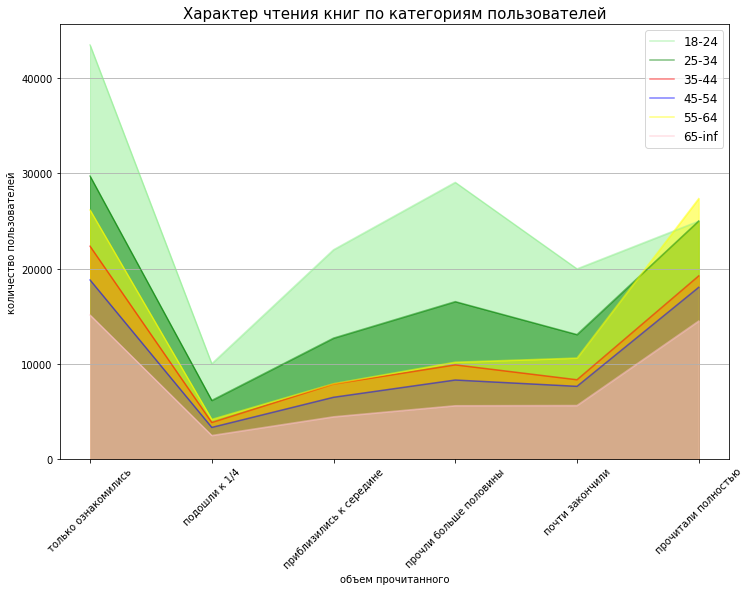

In [16]:
# построим график

colors = ['lightgreen','green','red','blue','yellow','pink']

period_22month_age_volume.plot(kind='area', stacked=False, figsize=(12, 8), color=colors, rot=45)

plt.title('Характер чтения книг по категориям пользователей', fontsize=15)

plt.xlabel('объем прочитанного')
plt.ylabel('количество пользователей')
plt.legend(['18-24', '25-34', '35-44', '45-54', '55-64', '65-inf'], fontsize=12)
plt.grid(axis='y')

Согласно данным, около 30% (иначе - почти треть) пользователей остановили свое чтение на стадии ознакомления: или сюжет не заинтересовал, или отложили "на потом когда-нибудь".

Из оставшихся:
- 15% прочитали книги больше чем на половину,
- другие 25% (если быть точным, то 24,8%) узнали чем по замыслу автора закончились приключения героев.

"Осиливших" 1/4 книги, - незначительное количество: или пользователи почти сразу откложили книгу, или продолжили чтение дальше.

Если предположить, что дочитывающие до конца книги и есть те люди, которые уделяют чтению больше времени, тогда здесь можно выделить три возрастные категории:
- интервал 55-64 года. До недавнего времени это был возраст выхода на пенсию, когда появляется больше свободного времени, в том числе и на чтение. Именно этим можно объяснить наибольшее количество до конца прочитанных книг у данных пользователей.
- возрастные группы: до 24-х и от 25-ти до 34-х лет. Это молодые энергичные люди, которые быстро принимают решение: если увлекает сюжет книги, то дочитывают до конца, в противном случае - не задумываясь откладывают начатое чтение (таких - наибольшее количество в сравнении с другими группами).

Посмотрим книги каких жанров (из 9 ранее выбранных) дочитывают чаще других.

In [17]:
# определим по жанрам сколько раз полностью прочитали книги

col_1 = ['Боевая фантастика',
 'Боевое фэнтези',
 'Героическое фэнтези',
 'Зарубежные любовные романы',
 'Любовное фэнтези',
 'Попаданцы',
 'Современная русская литература',
 'Современные детективы',
 'Современные любовные романы']

max_readed_9genres = period_22month.loc[period_22month['volume_of_readed'] == 'прочитали полностью'][[x for x in col_1]]
max_readed_9genres.sum().sort_values(ascending=False)

Любовное фэнтези                  38810
Попаданцы                         25281
Героическое фэнтези               19881
Современные детективы             19577
Современные любовные романы       17983
Зарубежные любовные романы        15300
Боевая фантастика                 14438
Боевое фэнтези                    12873
Современная русская литература     9920
dtype: int64

Для полноты картины получим данные о количестве книг, загруженных в библиотеку, по каждому из 9-ти жанров.

In [18]:
# запишем значения в словарь
books = {}

# рассчитаем по каждому жанру количество книг (по уникальному id)
for xx in col_1:
    count = period_22month.loc[period_22month[xx]==1]['item_id'].nunique()
    books[xx] = count

# отсортируем словарь по значениям (с помощью модуля operator)
import operator

books = sorted(books.items(), key = operator.itemgetter(1), reverse=True)
books

[('Современная русская литература', 3839),
 ('Современные детективы', 3166),
 ('Современные любовные романы', 3033),
 ('Боевая фантастика', 2625),
 ('Попаданцы', 2453),
 ('Зарубежные любовные романы', 2224),
 ('Любовное фэнтези', 2207),
 ('Боевое фэнтези', 1922),
 ('Героическое фэнтези', 1841)]

Среди пользователей библиотеки подавляющее большинство - женщины: 69% против 31% мужчин.

Т.к. женщины больше склонны к любовной тематике, неудивительно, что "любовное фэнтези" стало самым дочитываемым жанром, хотя по количеству книг он лишь на 7-ом месте (что тоже не мало).

В то же время, "современная русская литература", из 9-ти рассмотренных жанров, лидирует по наполнению библиотеки, однако, эти книги дочитывают до конца реже других.

Если сопоставить значения, то получится, что каждую книгу, написанную в жанре "любовное фэнтези", дочитывают до конца в среднем 17 раз, а книгу в жанре "современная русская литература" - только два.

Пользователи библиотеки могут поставить книге оценку от 1 до 5, в зависимости от того насколько она им понравилась. Но делают это редко, во всяком случае в исходных данных отсутствует 81% значений.

Тем не менее, на примере 9-ти жанров, посмотрим кто в принципе ставит оценки (кому интересна данная опция), а также на каком этапе прочтения их выставляют чаще.

In [19]:
# определим сколько всего данных с оценками

rating = period_22month.loc[~(period_22month['rating'].isna())]
rating = rating.reset_index(drop=True)
rating

,progress,user_id,item_id,rating,title,authors_all,year,age,age_group,sex_all,...,Боевая фантастика,Боевое фэнтези,Героическое фэнтези,Зарубежные любовные романы,Любовное фэнтези,Попаданцы,Современная русская литература,Современные детективы,Современные любовные романы,volume_of_readed
0,69,42797,315927,5.0,Рассвет кровавой удачи,Андрей Ворон (Mr. Incognito2),2019,25_34,2.0,0.0,...,1,0,0,0,0,0,0,0,0,прочли больше половины
1,42,18548,153547,5.0,Случайные партнеры,Карла Кэссиди,2018,18_24,1.0,0.0,...,0,0,0,1,0,0,0,0,0,приблизились к середине
2,28,91177,52112,2.0,"Старая тайна, новый негодяй",Галина Романова,2009,35_44,3.0,0.0,...,0,0,0,0,0,0,0,1,0,приблизились к середине
3,39,32533,303571,4.0,Как отделаться от жениха и не влюбиться,Екатерина Романова,2018,35_44,3.0,0.0,...,0,0,0,0,1,0,0,0,0,приблизились к середине
4,39,3857,241678,4.0,Книги 18+,Анжелика Любимова,2019,18_24,1.0,1.0,...,0,0,0,0,0,0,0,0,1,приблизились к середине
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119762,99,71382,232241,5.0,Одна помолвка на троих,Галина Куликова,2014,45_54,4.0,0.0,...,0,0,0,0,0,0,0,0,1,почти закончили
119763,31,106162,30252,3.0,Да не судимы будете,Надежда Черкасова,2019,45_54,4.0,0.0,...,0,0,0,0,0,0,0,1,0,приблизились к середине
119764,9,69417,308234,5.0,Цель,Эль Кеннеди,2016,25_34,2.0,1.0,...,0,0,0,1,0,0,0,0,1,только ознакомились
119765,98,51487,102694,5.0,Магиня,Александра Лисина,2017,18_24,1.0,1.0,...,0,0,1,0,1,0,0,0,0,почти закончили


Справочно: полученный массив - это почти четверть датафрейма ( 23% ) с данными за 22 месяца.

In [20]:
rating.to_csv('rating.csv', index=False)

In [21]:
# определим каких и сколько выставлено оценок
rating_total = rating.groupby('rating').count().rename(columns={'age': 'quantity'})[['quantity']]

# добавим удельный вес
s_r = rating_total['quantity'].sum()
rating_total['percent'] = rating_total['quantity'] / s_r

# приведем к процентному формату
rating_total['percent'] = rating_total['percent'].map(lambda pp: '{:,.1%}'.format(pp))

rating_total

,quantity,percent
rating,,
1.0,2409,2.0%
2.0,2575,2.2%
3.0,7970,6.7%
4.0,17559,14.7%
5.0,89254,74.5%


Общая картина по оценкам понятна: у максимального рейтинга убедительный перевес.

Так как оценку книге можно поставить только прочитав ее (или как минимум ознакомившись), посмотрим на распределение рейтинга в зависимости от прочитанного объема.

In [22]:
# определим количество оценок по прогрессу
rating_progress = rating.groupby(['rating', 'volume_of_readed']).count().unstack('rating').rename(columns={'year': 'quantity'})[['quantity']]

# изменим индексы (в переменную записан нужный порядок)
rating_progress = rating_progress.reindex(new_index)

rating_progress

quantity                          
rating                       1.0   2.0   3.0    4.0    5.0
volume_of_readed                                          
только ознакомились          179   203   611   1425   8017
подошли к 1/4                 86    94   274    577   3285
приблизились к середине      233   221   658   1440   7532
прочли больше половины       306   303   929   1946  10232
почти закончили              260   272   833   1858  11363
прочитали полностью         1345  1482  4665  10313  48825

Из всех "пятерок" наибольшее количество (55%) поставлено полностью прочитанным книгам.

Как ни удивительно, оценку "5" поставили также тем книгам, которые не прочитали в совокупности и больше четверти объема. Возникает вопрос: если книга так хороша, что ей дали высокую оценку, почему не стали дочитывать до конца? А может за высокий рейтинг пользователи получают какие-то бонусы? Выставленные на данном этапе чтения оценки не считаю объективными.

Рейтинг "1" и "2" очень близок по смыслу: первый можно трактовать, как "совсем не понравилось, очень плохо", второй - как "не понравилось, плохо". Как пользователи определяют что поставить - единицу или двойку - не известно, однако, полученное распределение данных по этими оценками практически одинаковое (если построить по ним график, линии будут почти сливаться в одну).

Про выставленные оценки "3" и "4" можно лишь сказать, что их количество на каждом из этапов чтения отличается друг от друга чуть больше, чем в 2 раза.

Посмотрим же кто из пользователей чаще оценивает прочитанные книги. Для этого возьмем только две категории: "почти закончили" чтение и "прочитали полностью", т.к. именно в этом случае можно рассчитывать на объективность и обоснованность пользовательского рейтинга.

In [23]:
# выберем прочитанный объем
volume = ['почти закончили', 'прочитали полностью']

# сгруппируем данные
rating_2volume = rating.loc[rating['volume_of_readed'].isin(volume)]\
                .groupby(['rating','age']).count()\
                .rename(columns={'user_id': 'amount'})[['amount']]

# представим в "понятном" виде
rating_2volume.unstack('rating')

amount                        
rating    1.0  2.0   3.0   4.0    5.0
age                                  
18_24     256  267   773  1624  12623
25_34     327  303   983  1943  12230
35_44     170  213   741  1896   9036
45_54     198  241   815  1764   8756
55_64     464  541  1418  3087  11053
65_inf    190  189   768  1857   6490

Построим два графика: для оценок "4" и "5" (их количество значительно больше) и для всех остальных.

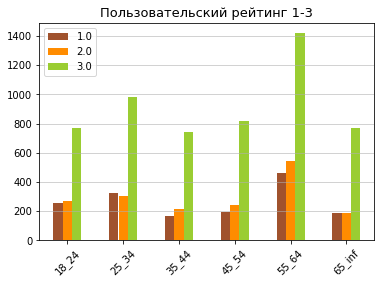

In [24]:
# график для рейтинга с 1-го по 3-ий

rating_2volume\
    .loc[pd.IndexSlice["1.0":"3.0", :], :]\
    .unstack('rating')\
    .plot(kind='bar', color=['sienna','darkorange','yellowgreen'], rot=45)

plt.title('Пользовательский рейтинг 1-3', fontsize=13)
plt.legend(['1.0','2.0','3.0'], loc='upper left')
plt.xlabel('')
plt.grid(axis='y', alpha=0.7)

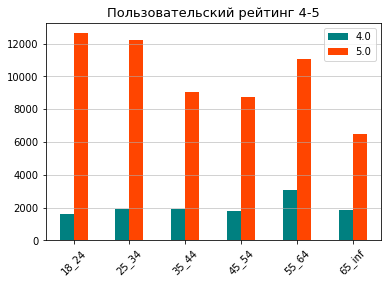

In [25]:
# график для рейтинга "4" и "5"

rating_2volume\
    .loc[pd.IndexSlice["4.0":"5.0", :], :]\
    .unstack('rating')\
    .plot(kind='bar', color=['teal','orangered'], rot=45)

plt.title('Пользовательский рейтинг 4-5', fontsize=13)
plt.legend(['4.0','5.0'])
plt.xlabel('')
plt.grid(axis='y', alpha=0.7)

Как было отмечено ранее, у читателей возрастной группы 55-64 - большой интерес к чтению, что объясняет и количество выставленного рейтинга прочитанным книгам. В части плохих (1 и 2) и средних (3) оценок эти пользователи значительно опережают всех остальных, а по максимальному рейтингу приближаются к молодым группам.

Читателям от 35 до 55, как и более старшим (65+), выставление рейтинга книгам не особенно интересно: количество их оценок, которые по категориям сопоставимы друг с другом, меньше, чем у других.

Пользователи до 35-ти лет, составляющие большинство читатетей библиотеки МТС, чаще оценивают прочитанные книги. Так, в общем количестве "пятерок" им принадлежит почти треть.

Посмотрим книгам какого из 9-ти жанров пользователи поставили больше всего оценок и какая книга вызвала наибольший отклик (здесь также рассмотрим только те книги, которые "почти закончили" или "прочитали полностью").

In [26]:
# определим суммарное количество оценок по каждому жанру
# (в переменной volume - список из двух нужных объемов чтения,
# в переменной col_1 - список из 9-ти жанров)

rating_2volume_9genres = rating.loc[rating['volume_of_readed'].isin(volume)][[x for x in col_1]]
rating_2volume_9genres.sum().sort_values(ascending=False)

Любовное фэнтези                  23513
Попаданцы                         15852
Героическое фэнтези               12416
Современные детективы             12374
Современные любовные романы       10889
Боевая фантастика                  9742
Зарубежные любовные романы         9054
Боевое фэнтези                     8099
Современная русская литература     6968
dtype: int64

"Любовное фэнтези", как определили ранее, - самый популярный жанр: у четырех возрастных групп он на первом месте по читаемости, у двух - 18-24 и 65+ - на втором. Поэтому этот жанр, что и подтвердили данные, оказался самым дочитываемым и оцениваемым.

Среди загруженных в библиотеку МТС книг в жанре "любовное фэнтези" пишут 629 авторов. Посмотрим чья книга набрала максимальное количество оценок, в т.ч. "пятерок" (среди книг, которые почти или полностью прочитаны).

In [27]:
# сформируем датафрейм (почти или полностью прочитанные книги жанра "любовное фэнтези")

rating_love_fantasy = rating.loc[(rating['Любовное фэнтези'] == 1) & (rating['volume_of_readed'].isin(volume))]

In [28]:
# определим сколько раз оценили каждую книгу (уникальный id - "отправная точка")

rating_love_fantasy[['item_id','authors_all','title']].value_counts()

item_id  authors_all                     title                                                
78934    Лена Летняя                     Невеста Смерти                                           170
216356   Валентина Савенко               Вдова мастера теней                                      166
198447   Валентина Савенко               Мечта светлой тьмы                                       150
196238   Милена Завойчинская             Струны волшебства. Книга вторая. Цветная музыка сидхе    120
265425   Екатерина Елизарова             Ключ от твоего мира                                      118
                                                                                                 ... 
265684   Ольга Коробкова                 Секретарь для некроманта                                   1
48462    Ольга Подпалова,Таисс Эринкайт  По следу Зверя. Игры больших кошек                         1
112986   Анастасия Сагран                Осенний дом                                     

In [29]:
# то же, но среди "пятерок"

rating_love_fantasy.loc[rating_love_fantasy['rating'] == 5.0][['item_id','authors_all','title']].value_counts()

item_id  authors_all          title                                                
78934    Лена Летняя          Невеста Смерти                                           140
216356   Валентина Савенко    Вдова мастера теней                                      114
196238   Милена Завойчинская  Струны волшебства. Книга вторая. Цветная музыка сидхе    102
106369   Наталья Жильцова     Обрученные кровью. Отбор                                 101
274542   Елена Звёздная       Шепот в темноте                                          101
                                                                                      ... 
84261    Ксения Томашева      Серебряная Маска                                           1
232350   Ксения Болотина      Танец с мечами                                             1
232039   Лина Алфеева         Элементарная магия                                         1
231893   Надежда Волгина      Золушка XY                                                 1
130   

Не знаю, насколько хорош роман Лены Летней "Невеста Смерти", но в 82% случаев, когда книгу прочитали целиком (или почти закончили), выставлен максимальный рейтинг.

Для сравнения посмотрим на оценки самого читаемого в библиотеке МТС автора жанра "любовное фэнтези" Елену Звездную и ее самый популярный роман "Долина драконов. Магическая практика" (книгу за два года прочитали 463 раза).

In [30]:
# выберем необходимые данные
rating_zvezdnaya = rating.loc[(rating['authors_all'] == "Елена Звёздная") & (rating['title'] == "Долина драконов. Магическая Практика")]

# определим количество строк в датафрейме
rating_zvezdnaya.shape[0]

123

In [31]:
# сгруппируем данные по рейтингу и объему
r_z = rating_zvezdnaya.groupby(['rating','volume_of_readed']).count().unstack('rating').rename(columns={'age': 'rating_quantity'})[['rating_quantity']]

# приведем индексы в нужный порядок
r_z = r_z.reindex(new_index)

# заполним пропущенные значения (если таковые есть)
r_z.fillna("-")

rating_quantity           
rating                              2.0  4.0   5.0
volume_of_readed                                  
только ознакомились                   -  1.0  11.0
подошли к 1/4                         -    -   3.0
приблизились к середине               -    -     -
прочли больше половины                -    -   4.0
почти закончили                     1.0    -   5.0
прочитали полностью                   -  7.0  91.0

Рейтинг книг - весьма неоднозначная тема. Помимо того, что далеко не все пользователи хотят делиться своим мнением о книге выставляя оценку, так и сами оценки вызывают много вопросов.

Понятно, что у каждого читателя свои критерии "нравится / не нравится", свой читательский опыт в том или ином жанре. Но любая оценка должна быть объективной настолько, чтобы можно было ей доверять. А это, естественно, заранее не известно.

Таким образом, какие оценки принимать во внимание, а какие отбрасывать, - вопрос открытый. Брать в расчет только те книги, которые прочитаны, - лишь один из вариантов.

В подтверждение сказанного - рейтинг рассмотренной книги про долину драконов. Несмотря на ее популярность, желание оценить книгу возникло лишь в четверти случаев (точнее в 26,5%: 123 из 463-х прочтений). Из всех оценок максимальное количество (80%) поставлено пользователями после завершения чтения, в 9% случаев читатели,что называется, открыли и закрыли книгу, оценив ее при этом на "5".

Рассмотрим еще один блок данных, связанных с датой начала чтения, и определим:
- сколько книг из библиотеки МТС читают ежемесячно / ежедневно,
- влияет ли сезонность на количество читающих пользователей,
- есть ли зависимость между временем года и выбираемым жанром книги.

Здесь не важно дочитают ли пользователи книгу до конца или нет, нас интересует дата начала чтения как таковая и рассматривать ее будем на примере датафрейма с уже известными 9-тью жанрами за полные два года.

In [32]:
# выберем данные за 2018 год и определим сколько книг читают в месяц

best_9genres_2018 = df_data_all_best_9genres\
                    .loc[df_data_all_best_9genres['start_year'] == 2018]\
                    .groupby('start_month').count()\
                    .rename(columns={'age': 'reads_on_month'})[['reads_on_month']]
best_9genres_2018

,reads_on_month
start_month,
1,19448
2,19157
3,20961
4,20276
5,21132
6,21410
7,24118
8,23640
9,23636


In [33]:
# создадим списки месяцев по количеству дней
days_30 = [4, 6, 9, 11]
days_31 = [1, 3, 5, 7, 8, 10, 12]

# рассчитаем количество читаемых книг за день (в новом столбце)

best_9genres_2018.loc[best_9genres_2018.index.isin(days_30), 'reads_on_day'] = best_9genres_2018['reads_on_month'] / 30
best_9genres_2018.loc[best_9genres_2018.index.isin(days_31), 'reads_on_day'] = best_9genres_2018['reads_on_month'] / 31
best_9genres_2018.loc[best_9genres_2018.index == 2, 'reads_on_day'] = best_9genres_2018['reads_on_month'] / 28

# округлим рассчитанные значения
best_9genres_2018['reads_on_day'] = best_9genres_2018['reads_on_day'].round(0).astype(int)

best_9genres_2018

,reads_on_month,reads_on_day
start_month,,
1,19448,627
2,19157,684
3,20961,676
4,20276,676
5,21132,682
6,21410,714
7,24118,778
8,23640,763
9,23636,788


In [34]:
# запишем последние преобразования в функцию

def reads_on_period (df, year):
    rr = df.loc[df.start_year == year].groupby('start_month').count().rename(columns={'age': 'reads_on_month'})[['reads_on_month']]
    
    rr.loc[rr.index.isin(days_30), 'reads_on_day'] = rr.reads_on_month / 30
    rr.loc[rr.index.isin(days_31), 'reads_on_day'] = rr.reads_on_month / 31
    rr.loc[rr.index == 2, 'reads_on_day'] = rr.reads_on_month / 28

    rr.reads_on_day = rr.reads_on_day.round(0).astype(int)

    return rr

In [35]:
# проверим результат ее работы

reads_on_period(df_data_all_best_9genres, 2018)

,reads_on_month,reads_on_day
start_month,,
1,19448,627
2,19157,684
3,20961,676
4,20276,676
5,21132,682
6,21410,714
7,24118,778
8,23640,763
9,23636,788


In [36]:
# получим аналогичные данные за 2019 год

best_9genres_2019 = reads_on_period(df_data_all_best_9genres, 2019)
best_9genres_2019

,reads_on_month,reads_on_day
start_month,,
1,25277,815
2,23315,833
3,25943,837
4,25572,852
5,27011,871
6,24058,802
7,25577,825
8,25952,837
9,25728,858


In [37]:
# объединим две таблицы

days_2018_2019 = best_9genres_2018.merge(best_9genres_2019, how='left', on='start_month')
days_2018_2019

,reads_on_month_x,reads_on_day_x,reads_on_month_y,reads_on_day_y
start_month,,,,
1,19448,627,25277,815
2,19157,684,23315,833
3,20961,676,25943,837
4,20276,676,25572,852
5,21132,682,27011,871
6,21410,714,24058,802
7,24118,778,25577,825
8,23640,763,25952,837
9,23636,788,25728,858


In [38]:
# переименуем столбцы

days_2018_2019.columns = ['reads_on_month_2018', 'reads_on_day_2018', 'reads_on_month_2019', 'reads_on_day_2019']
days_2018_2019

,reads_on_month_2018,reads_on_day_2018,reads_on_month_2019,reads_on_day_2019
start_month,,,,
1,19448,627,25277,815
2,19157,684,23315,833
3,20961,676,25943,837
4,20276,676,25572,852
5,21132,682,27011,871
6,21410,714,24058,802
7,24118,778,25577,825
8,23640,763,25952,837
9,23636,788,25728,858


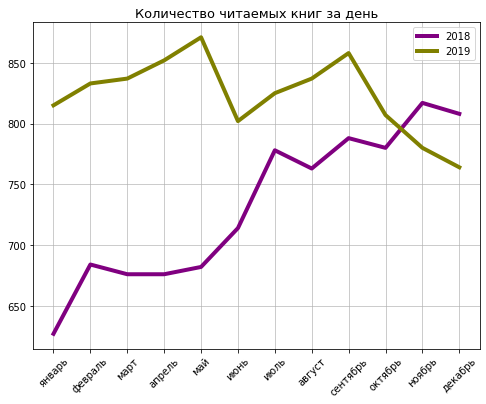

In [39]:
# построим график по чтению за день

plt.figure(figsize=(8,6))

days_2018_2019['reads_on_day_2018'].plot(linewidth=4, color='purple', rot=45)
days_2018_2019['reads_on_day_2019'].plot(linewidth=4, color='olive', rot=45)

plt.legend(['2018','2019'])

months_list = ['январь', 'февраль', 'март', 'апрель', 'май', 'июнь', 'июль', 'август', 'сентябрь', 'октябрь', 'ноябрь', 'декабрь']
plt.xticks(range(1,13), months_list)
plt.xlabel('')

plt.title('Количество читаемых книг за день', fontsize=13)
plt.grid(alpha=0.8)

В течение всего 2018 года среднедневное количество книг, которые пользователи начинали читать, неуклонно росло. В 2019 году такая тенденция сохранилась только до июня и продолжилась в 3-ем квартале, в остальное время интерес к книгам падал.

Здесь стоит напомнить, что общее количество читателей библиотеки в 2019 году сократилось на полторы тысячи (точнее на 1.575). Возможно на это повлияло изменение тарифной политики МТС (точной информации об этом нет), возможно - другие, неявные сейчас, причины.

Для сопоставления книг и пользователей, а также выявления сезонности у последних, получим аналогичные книгам данные по уникальным читателям.

In [40]:
# определим количество читателей в 2018 году по месяцам

best_9genres_2018_user = df_data_all_best_9genres\
                    .loc[df_data_all_best_9genres['start_year'] == 2018]\
                    .groupby('start_month')['user_id'].nunique()

best_9genres_2018_user = best_9genres_2018_user.reset_index()
best_9genres_2018_user.columns = ['start_month', 'users_on_month']

best_9genres_2018_user

,start_month,users_on_month
0,1,14568
1,2,14283
2,3,14559
3,4,13926
4,5,13840
5,6,13223
6,7,12639
7,8,12568
8,9,11694
9,10,12382


In [41]:
# напишем функцию для читателей аналогичную книгам

def users_on_period (df, year):
    uu = df.loc[df.start_year == year].groupby('start_month')['user_id'].nunique()

    uu = uu.reset_index()
    uu.columns = ['start_month', 'users_on_month']

    uu.loc[uu.start_month.isin(days_30), 'users_on_day'] = uu.users_on_month / 30
    uu.loc[uu.start_month.isin(days_31), 'users_on_day'] = uu.users_on_month / 31
    uu.loc[uu.start_month == 2, 'users_on_day'] = uu.users_on_month / 28

    uu.users_on_day = uu.users_on_day.round(0).astype(int)

    return uu

In [42]:
# получим "полные" данные по читателям за 2018 год (перезапишем датафрейм)

best_9genres_2018_user = users_on_period(df_data_all_best_9genres, 2018)
best_9genres_2018_user

,start_month,users_on_month,users_on_day
0,1,14568,470
1,2,14283,510
2,3,14559,470
3,4,13926,464
4,5,13840,446
5,6,13223,441
6,7,12639,408
7,8,12568,405
8,9,11694,390
9,10,12382,399


In [43]:
# то же - за 2019

best_9genres_2019_user = users_on_period(df_data_all_best_9genres, 2019)
best_9genres_2019_user

,start_month,users_on_month,users_on_day
0,1,11938,385
1,2,11610,415
2,3,12923,417
3,4,13050,435
4,5,13489,435
5,6,12995,433
6,7,12535,404
7,8,11650,376
8,9,11714,390
9,10,13172,425


In [45]:
# объединим две таблицы
users_2018_2019 = best_9genres_2018_user.merge(best_9genres_2019_user, how='left', on='start_month')

# переименуем столбцы
users_2018_2019.columns = ['start_month', 'users_on_month_2018', 'users_on_day_2018', 'users_on_month_2019', 'users_on_day_2019']

users_2018_2019

,start_month,users_on_month_2018,users_on_day_2018,users_on_month_2019,users_on_day_2019
0,1,14568,470,11938,385
1,2,14283,510,11610,415
2,3,14559,470,12923,417
3,4,13926,464,13050,435
4,5,13840,446,13489,435
5,6,13223,441,12995,433
6,7,12639,408,12535,404
7,8,12568,405,11650,376
8,9,11694,390,11714,390
9,10,12382,399,13172,425


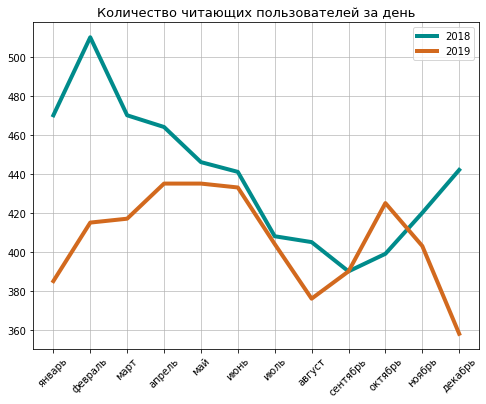

In [46]:
# построим график по количеству читателей за день

plt.figure(figsize=(8,6))

users_2018_2019['users_on_day_2018'].plot(linewidth=4, color='darkcyan', rot=45)
users_2018_2019['users_on_day_2019'].plot(linewidth=4, color='chocolate', rot=45)

plt.legend(['2018','2019'])

plt.xticks(range(0,12), months_list)
plt.xlabel('')

plt.title('Количество читающих пользователей за день', fontsize=13)
plt.grid(alpha=0.8)

In [ ]:
#

In [ ]:
#

In [ ]:
~